In [1]:
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last"

In [2]:
# %load_ext rpy2.ipython

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import datetime
import seaborn as sns
# import contractions
from langdetect import detect
from dateutil import parser
import pytz
from datetime import datetime
from afinn import Afinn
from pprint import pprint

In [5]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import tqdm
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [6]:
import  csv
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(['http','https'])
import gensim,spacy
import enchant
d = enchant.Dict("en_US")
from nltk.corpus import words
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

from nltk.corpus import wordnet
from gensim import corpora, models

import nltk
from nltk.tokenize import TweetTokenizer, sent_tokenize
from nltk.stem.lancaster import LancasterStemmer

from nltk.stem import WordNetLemmatizer

from texthero import preprocessing
import texthero as hero

In [7]:
import glob
link_id_files = sorted(glob.glob("./RS/EVPlus_link_id_list*.pkl"))
print(len(link_id_files))

126


In [8]:
import random
random.randint(-1,10000)
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
# %config InlineBackend.figure_format='svg'
# plt.style.use('classic')
# plt.style.use(['science','no-latex'])

# Get RC/RS files

In [9]:
link_id_lst = sum([pd.read_pickle(_) for _ in link_id_files],[])
link_id_lst = ["t3_"+_ for _ in link_id_lst]
link_id_lst = sorted(link_id_lst)

In [10]:
len(link_id_lst),len(set(link_id_lst))

(277956, 277956)

In [11]:
EV_RS_files = sorted(glob.glob("./RS/EVPlus_RS*.csv"))
RSnames_lst = [_.split('/')[-1].split('.')[0].replace('-','_') for _ in EV_RS_files]
print(RSnames_lst[:3])

df_reddit_extend_RS = pd.concat([pd.read_csv(_) for _ in EV_RS_files],sort=True)
df_reddit_extend_RS = df_reddit_extend_RS.reset_index(drop=True)
print(df_reddit_extend_RS.shape)

['EVPlus_RS_2011_01', 'EVPlus_RS_2011_02', 'EVPlus_RS_2011_03']
(332983, 158)


In [233]:
# len(EV_RS_files),EV_RS_files

In [13]:
EV_RC_files = sorted(glob.glob("./RC/EVPlus_RC*.csv"))
print(len(EV_RC_files),EV_RC_files[13])

names_lst = [_.split('/')[-1].split('.')[0].replace('-','_') for _ in EV_RC_files]
print(names_lst[:3])

120 ./RC/EVPlus_RC_2012-02.csv
['EVPlus_RC_2011_01', 'EVPlus_RC_2011_02', 'EVPlus_RC_2011_03']


In [234]:
# glob.glob("./RS/EVPlus_RS*.csv")

In [15]:
import dateutil.parser as dparser
# dparser.parse("monkey 2010-07-10 love banana",fuzzy=True).strftime("%Y-%m")
# dparser.parse(EV_RC_files[13].split('/')[-1].split('.')[0],fuzzy=True).strftime("%Y-%m")
months_lst = [_.split('/')[-1].split('.')[0] for _ in EV_RC_files]
months_lst = [dparser.parse(_.split('/')[-1].split('.')[0],fuzzy=True).strftime("%Y-%m") for _ in months_lst]
months_lst[:3]

['2011-01', '2011-02', '2011-03']

In [16]:
import bisect
def binarySearch3(lst,x):
    i = bisect.bisect_left(lst,x)
    if i != len(lst) and lst[i] == x:
        return True
    return False

irrelevant_subreddits = ['hockey','Pokemongiveaway','pokemontrades','PokemonPlaza','PokemonForAll','pokemon',
                         'stunfisk','BreedablePokemon','Warframe','Barca','CasualPokemonTrades','magicTCG',
                         'poker','DestinyTheGame','Dirtybomb','RWBY','FFBraveExvius','mtgfinance','vancouver',
                         'WonderTrade','MagicArena','livesound','SVExchange','sto','swtor','TampaBayLightning',
                         'NintendoSwitch','pathofexile','soccer','GiveMeTheVirus','fantasyfootball','TheSilphRoad',
                         'easymons','gaming','evnova','spikes','lrcast','hearthstone','VGC','pcmasterrace','MTGO',
                         'asktransgender','TransDIY','qotsa','etheroll','senrankagura','DJs','AskMtFHRT','nba',
                         'cataclysmdda','StarTrekTimelines','blackjack','Games','de','InsurgenceTrades','baseball',
                         'dungeondefenders','dankmemes','csgobetting','BreedingDittos','nfl','3DS','MtF','battlebots',
                         'Beatmatch','3dshacks','redsox','Stellaris','ChapoTrapHouse','MHOC']

irrelevant_subreddits = sorted(irrelevant_subreddits)

In [17]:
def refine_RC(df_reddit_extend):
    df_reddit_extend = df_reddit_extend[~df_reddit_extend.subreddit.isnull()]
    df_reddit_extend = df_reddit_extend[~df_reddit_extend.subreddit.str.contains("(?i)poke|trans|MHOC")]
#     df_reddit_extend = df_reddit_extend.reset_index(drop=True)
    df_reddit_extend = df_reddit_extend.loc[df_reddit_extend.subreddit.
                                            apply(lambda _:not binarySearch3(irrelevant_subreddits,_))]
    df_reddit_extend = df_reddit_extend[~df_reddit_extend.body.isnull()].reset_index(drop=True)
    df_reddit_extend = df_reddit_extend[df_reddit_extend.body != '[deleted]'].reset_index(drop=True)
    df_reddit_extend = df_reddit_extend.loc[df_reddit_extend.body.apply(lambda _:len(_)> 0 and not _.isspace())]
    df_reddit_extend = df_reddit_extend.reset_index(drop=True)
    return df_reddit_extend

# Dataframe

## Plot Settings

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'
# plt.style.use('classic')
# plt.style.use(['science','no-latex'])

In [19]:
d = pd.date_range(start='1/1/2011', end='12/31/2019', freq='MS')    
d = pd.date_range(start='1/1/2011', end='12/31/2020', freq='MS') 
print(d,len(d))
d_RS = pd.date_range(start='1/1/2011', end='04/30/2020', freq='MS')  
d_TW = pd.date_range(start='1/1/2011', end='07/31/2021', freq='MS')

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS') 120


## Construct df_reddit_extend

In [20]:
# df_reddit_extend = pd.read_pickle("df_reddit_extend_ori.pkl")
# print(df_reddit_extend.shape)
# df_reddit_extend = df_reddit_extend[~df_reddit_extend.body.str.contains("(?i)pokemon")]
# print(df_reddit_extend.shape)
# df_reddit_extend = df_reddit_extend[~(df_reddit_extend.body.str.contains("(?i)play|game")&
#                                     df_reddit_extend.body.str.contains(r"\b(ev|EV)\b"))]
# print(df_reddit_extend.shape)
# pd.DataFrame(df_reddit_extend.subreddit.value_counts()).reset_index().to_csv('subreddits_filtered.txt',index=False)


### Create df_reddit_extend.pkl

In [21]:
# # EV_RC_files[13].split('/')[-1].split('.')[0].replace('-','_')
# # EV_RC_files[13].split('/')[-1].split('.')[0]
# import dateutil.parser as dparser
# # dparser.parse("monkey 2010-07-10 love banana",fuzzy=True).strftime("%Y-%m")
# # dparser.parse(EV_RC_files[13].split('/')[-1].split('.')[0],fuzzy=True).strftime("%Y-%m")
# months_lst = [_.split('/')[-1].split('.')[0] for _ in EV_RC_files]
# months_lst = [dparser.parse(_.split('/')[-1].split('.')[0],fuzzy=True).strftime("%Y-%m") for _ in months_lst]
# print(months_lst[:3],len(months_lst))

# df_reddit_extend = pd.concat([pd.read_csv(_).assign(month=month) for _,month in zip(EV_RC_files,months_lst)])

# df_reddit_extend = refine_RC(df_reddit_extend)

# df_reddit_extend = df_reddit_extend.reset_index(drop=True)

# df_reddit_extend['created_at'] = \
# df_reddit_extend['created_utc'].apply(lambda _:datetime.fromtimestamp(_))

# df_reddit_extend.to_pickle("df_reddit_extend.pkl")

In [22]:
# df_reddit_extend.to_pickle("df_reddit_extend.pkl")
# del df_reddit_extend
# df_reddit_extend.shape

In [23]:
df_reddit_extend = pd.read_pickle("df_reddit_extend.pkl")
print(df_reddit_extend.shape)

(3162938, 75)


In [24]:
# df_reddit_extend = pd.read_pickle("df_reddit_extend.pkl")
# print(df_reddit_extend.shape)

In [25]:
# pd.DataFrame(df_reddit_extend.subreddit.value_counts()).reset_index().to_csv('subreddits_filtered.txt',index=False)

In [26]:
# df_reddit_extend.iloc[123,]['created_at'].strftime('%Y-%m')
df_reddit_extend = df_reddit_extend.assign(month=list(map(lambda 
                                                          _:_.strftime('%Y-%m'),df_reddit_extend.created_at)))

In [27]:
import bisect
def binarySearch3(lst,x):
    i = bisect.bisect_left(lst,x)
    if i != len(lst) and lst[i] == x:
        return True
    return False

In [28]:
df_reddit_extend[df_reddit_extend.link_id.isnull()].body.values.tolist()
# df_reddit_extend.loc[df_reddit_extend.link_id.isnull()].link_id

[]

In [29]:
df_linkid = df_reddit_extend[df_reddit_extend.link_id.apply(lambda _:binarySearch3(link_id_lst,_))
                             |df_reddit_extend.subreddit.isin(['electricvehicles','electriccars'])]
df_linkid.shape,df_reddit_extend.shape

((2326801, 75), (3162938, 75))

In [30]:
df_notlinkid = df_reddit_extend[~df_reddit_extend.link_id.
                                apply(lambda _:binarySearch3(link_id_lst,_))].reset_index(drop=True)
df_notlinkid[~df_notlinkid.subreddit.isin(['electricvehicles','electriccars'])].shape,df_notlinkid.shape

((836137, 75), (1454806, 75))

## RC without Corres RS

In [31]:
df_RCnoCorresRS = df_notlinkid[~df_notlinkid.subreddit.isin(['electricvehicles','electriccars'])]
df_RCnoCorresRS.shape,df_RCnoCorresRS.link_id.nunique()

((836137, 75), 376680)

In [32]:
lst_linkid_valuecounts = df_RCnoCorresRS.link_id.value_counts().values
lst_linkid_valuecounts_exone = [_ for _ in lst_linkid_valuecounts if _>1]

In [33]:
# df_reddit_extend.iloc[123,]['created_at'].strftime('%Y-%m')

# Monthly RC/RS/TW Count

In [34]:
def get_RCnum(df_reddit_extend):
    df_reddit_extend = df_reddit_extend[~df_reddit_extend.body.isnull()&
                                        ~df_reddit_extend.subreddit.isnull()].reset_index(drop=True)
    df_reddit_extend = df_reddit_extend[~df_reddit_extend.subreddit.str.contains("(?i)poke|trans|MHOC")]
    df_reddit_extend = df_reddit_extend.reset_index(drop=True)
    df_reddit_extend = df_reddit_extend.loc[df_reddit_extend.subreddit.
                                            apply(lambda _:not binarySearch3(irrelevant_subreddits,_))].reset_index(drop=True)

    return df_reddit_extend.shape[0]

def get_RCnum(df_reddit_extend):
    return refine_RC(df_reddit_extend).shape[0]

def get_RSnum(df_reddit_extend):
    df_reddit_extend = df_reddit_extend[~df_reddit_extend.subreddit.str.contains("(?i)poke|trans|MHOC")]
    df_reddit_extend = df_reddit_extend.reset_index(drop=True)
    df_reddit_extend = df_reddit_extend.loc[df_reddit_extend.subreddit.
                                            apply(lambda _:not binarySearch3(irrelevant_subreddits,_))].reset_index(drop=True)

    return df_reddit_extend.shape[0]

def get_RCwithRS(df_reddit_extend):
    df_reddit_extend = df_reddit_extend[~df_reddit_extend.body.isnull()&
                                        ~df_reddit_extend.subreddit.isnull()&
                                        ~df_reddit_extend.link_id.isnull()].reset_index(drop=True)
    df_reddit_extend = df_reddit_extend[~df_reddit_extend.subreddit.str.contains("(?i)poke|trans|MHOC")]
    df_reddit_extend = df_reddit_extend.reset_index(drop=True)
    df_reddit_extend = df_reddit_extend.loc[df_reddit_extend.subreddit.
                                            apply(lambda _:not binarySearch3(irrelevant_subreddits,_))].reset_index(drop=True)
    
    df_linkid = df_reddit_extend[df_reddit_extend.link_id.apply(lambda _:binarySearch3(link_id_lst,_))
                             |df_reddit_extend.subreddit.isin(['electricvehicles','electriccars'])]
    return df_linkid.shape[0]

In [35]:
irrelevant_subreddits = ['hockey','Pokemongiveaway','pokemontrades','PokemonPlaza','PokemonForAll','pokemon',
                         'stunfisk','BreedablePokemon','Warframe','Barca','CasualPokemonTrades','magicTCG',
                         'poker','DestinyTheGame','Dirtybomb','RWBY','FFBraveExvius','mtgfinance','vancouver',
                         'WonderTrade','MagicArena','livesound','SVExchange','sto','swtor','TampaBayLightning',
                         'NintendoSwitch','pathofexile','soccer','GiveMeTheVirus','fantasyfootball','TheSilphRoad',
                         'easymons','gaming','evnova','spikes','lrcast','hearthstone','VGC','pcmasterrace','MTGO',
                         'asktransgender','TransDIY','qotsa','etheroll','senrankagura','DJs','AskMtFHRT','nba',
                         'cataclysmdda','StarTrekTimelines','blackjack','Games','de','InsurgenceTrades','baseball',
                         'dungeondefenders','dankmemes','csgobetting','BreedingDittos','nfl','3DS','MtF','battlebots',
                         'Beatmatch','3dshacks','redsox','Stellaris','ChapoTrapHouse','MHOC']

irrelevant_subreddits = sorted(irrelevant_subreddits)

In [36]:
month_VaCn = df_reddit_extend.month.value_counts()
monthly_RC = [month_VaCn[_] for _ in months_lst]

In [37]:
len(EV_RS_files)

126

In [38]:
monthly_RS = [get_RSnum(pd.read_csv(_)) for _ in EV_RS_files]

In [39]:
sum(monthly_RS)

274979

In [40]:
monthly_RC_ori = [get_RCnum(pd.read_csv(_)) for _ in EV_RC_files]

In [41]:
monthly_RC[-13:],monthly_RC_ori[-13:]

([70908,
  77993,
  72522,
  49312,
  42883,
  53212,
  63322,
  91062,
  76242,
  107967,
  91706,
  117939,
  120943],
 [70986,
  77836,
  72801,
  49426,
  42825,
  53239,
  63235,
  90166,
  76744,
  108055,
  92006,
  117123,
  122145])

In [42]:
import pickle
with open('monthlyRC_cnt.pkl', 'rb') as f:  
    monthly_OverallRC = pickle.load(f)
    
with open('monthlyRS_cnt.pkl', 'rb') as f:  
    monthly_OverallRS = pickle.load(f)

with open('monthlyTW.pkl', 'rb') as f:  
    monthly_TW = pickle.load(f)
# monthlyPolarity_lst, monthlySubjectivity_lst
# len(monthly_RC),len(monthly_RS)

In [43]:
# monthly_RCwithRS = [get_RCwithRS(pd.read_csv(_,low_memory=False)) for _ in EV_RC_files]
# monthly_RS2020 = [get_RSnum(pd.read_csv(_,low_memory=False)) for _ in sorted(glob.glob("./RS/*EVPlus_RS*.csv"))]

In [44]:
d = pd.date_range(start='1/1/2011', end='12/31/2019', freq='MS')    
d = pd.date_range(start='1/1/2011', end='12/31/2020', freq='MS') 
print(d,len(d))
d_RS = pd.date_range(start='1/1/2011', end='04/30/2020', freq='MS')  
d_TW = pd.date_range(start='1/1/2011', end='07/31/2021', freq='MS')

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS') 120


## Montly Twitter plot

In [45]:
sum(monthly_TW),len(monthly_TW)

(11041185, 127)

In [46]:
for x,y in zip(monthly_TW,d_TW):
    print(x,y)

47987 2011-01-01 00:00:00
37908 2011-02-01 00:00:00
43245 2011-03-01 00:00:00
47708 2011-04-01 00:00:00
37658 2011-05-01 00:00:00
36754 2011-06-01 00:00:00
45743 2011-07-01 00:00:00
48890 2011-08-01 00:00:00
48570 2011-09-01 00:00:00
60863 2011-10-01 00:00:00
51322 2011-11-01 00:00:00
44204 2011-12-01 00:00:00
61268 2012-01-01 00:00:00
45567 2012-02-01 00:00:00
55388 2012-03-01 00:00:00
56145 2012-04-01 00:00:00
50176 2012-05-01 00:00:00
48870 2012-06-01 00:00:00
46668 2012-07-01 00:00:00
41881 2012-08-01 00:00:00
56871 2012-09-01 00:00:00
54056 2012-10-01 00:00:00
52198 2012-11-01 00:00:00
35697 2012-12-01 00:00:00
41868 2013-01-01 00:00:00
42946 2013-02-01 00:00:00
46968 2013-03-01 00:00:00
59747 2013-04-01 00:00:00
52737 2013-05-01 00:00:00
49768 2013-06-01 00:00:00
49532 2013-07-01 00:00:00
48157 2013-08-01 00:00:00
44665 2013-09-01 00:00:00
47514 2013-10-01 00:00:00
45752 2013-11-01 00:00:00
39128 2013-12-01 00:00:00
45245 2014-01-01 00:00:00
41317 2014-02-01 00:00:00
45896 2014-0

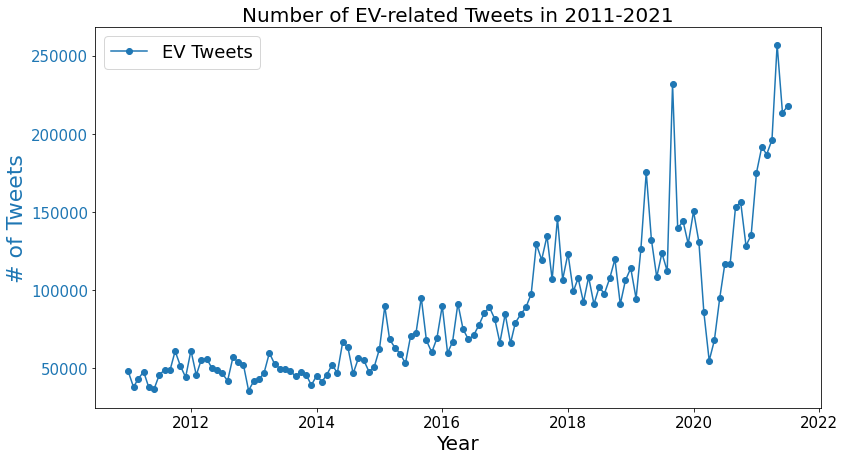

In [47]:
# import pandas as pd
# import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='retina'
# %config InlineBackend.figure_format='svg'

# df['date'] = df['month'].map(str)+ '-' +df['year'].map(str)
# df['date'] = pd.to_datetime(df['date'], format='%m-%Y').dt.strftime('%m-%Y')
fig, ax1 = plt.subplots(figsize=(13,7))

# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d_TW[:], monthly_TW[:],linestyle='-',c=color,label='EV Tweets')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('# of Tweets', color=color, fontsize= 22)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 15)

# ax2 = ax1.twinx()
# color = 'deeppink'
# lns2 = ax2.plot_date(d_RS, monthly_RS2020,linestyle='-.',c=color,label='EV Reddit Submissions')
# ax2.set_ylabel('# of Reddit Submissions', color=color, fontsize= 22)
# ax2.tick_params(axis='y', labelcolor=color, labelsize= 15)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
lns = lns1 
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 18},loc=2)
#plt.xticks(x,df_curr['Date'])
plt.title('Number of EV-related Tweets in 2011-2021', size=20)

# fig.savefig('Number of EV-Tweet Monthly.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()


# ax = fig.add_subplot(111)
# ax = plt.gca()
# ax.plot(time_bins, count_time, 'o', c='blue', alpha=0.53, markeredgecolor='none')
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.title('Response Time for @latimes Retweets', size=20)
# plt.xlabel('Response Time (log hours)', fontsize=16)
# plt.ylabel('# of Retweets', fontsize=16) 
# plt.yticks(fontsize=15)
# #plt.xticks(x,df_curr['Date'])
# plt.xticks(fontsize=15)

# ax2 = ax.twinx()  

## Monthly RC/RS (log) count

In [48]:
for x,y in zip(monthly_RC_ori,d):
    print(x,y)

1502 2011-01-01 00:00:00
1276 2011-02-01 00:00:00
2391 2011-03-01 00:00:00
1389 2011-04-01 00:00:00
1776 2011-05-01 00:00:00
3026 2011-06-01 00:00:00
1989 2011-07-01 00:00:00
4693 2011-08-01 00:00:00
1211 2011-09-01 00:00:00
2072 2011-10-01 00:00:00
1363 2011-11-01 00:00:00
1272 2011-12-01 00:00:00
1934 2012-01-01 00:00:00
6130 2012-02-01 00:00:00
4255 2012-03-01 00:00:00
2832 2012-04-01 00:00:00
3110 2012-05-01 00:00:00
2050 2012-06-01 00:00:00
2495 2012-07-01 00:00:00
4489 2012-08-01 00:00:00
3592 2012-09-01 00:00:00
3599 2012-10-01 00:00:00
3316 2012-11-01 00:00:00
3838 2012-12-01 00:00:00
4242 2013-01-01 00:00:00
6781 2013-02-01 00:00:00
4665 2013-03-01 00:00:00
5289 2013-04-01 00:00:00
7593 2013-05-01 00:00:00
6299 2013-06-01 00:00:00
6657 2013-07-01 00:00:00
8170 2013-08-01 00:00:00
4740 2013-09-01 00:00:00
6235 2013-10-01 00:00:00
8986 2013-11-01 00:00:00
13729 2013-12-01 00:00:00
7229 2014-01-01 00:00:00
6677 2014-02-01 00:00:00
8978 2014-03-01 00:00:00
8472 2014-04-01 00:00:00

In [49]:
# len(monthly_RC),len(monthly_RS),len(monthly_TW)

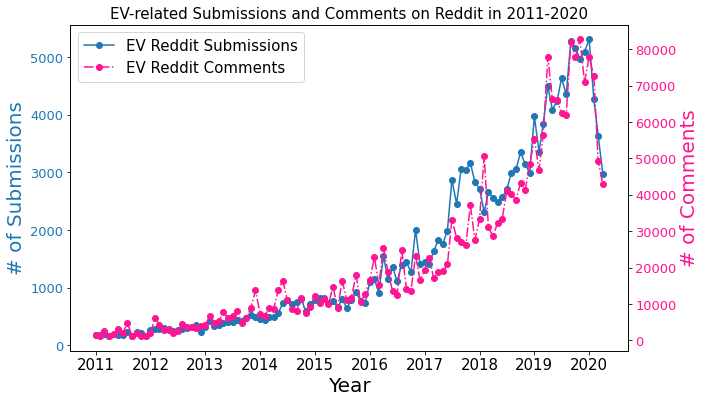

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'

fig, ax1 = plt.subplots(figsize=(10,6))

# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d[:112], monthly_RS[:112],linestyle='-',c=color,label='EV Reddit Submissions')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('# of Submissions', color=color, fontsize= 20)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 13)

ax2 = ax1.twinx()
color = 'deeppink'
lns2 = ax2.plot_date(d[:112], monthly_RC[:112],linestyle='-.',c=color,label='EV Reddit Comments')
ax2.set_ylabel('# of Comments', color=color, fontsize= 20)
ax2.tick_params(axis='y', labelcolor=color, labelsize= 13)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 15},loc=0)
#plt.xticks(x,df_curr['Date'])
plt.title('EV-related Submissions and Comments on Reddit in 2011-2020', size=15)

# fig.savefig('Number of EV-RCRS Monthly.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')

plt.show()


In [51]:
len(monthly_RC_ori),len(monthly_RS)

(120, 126)

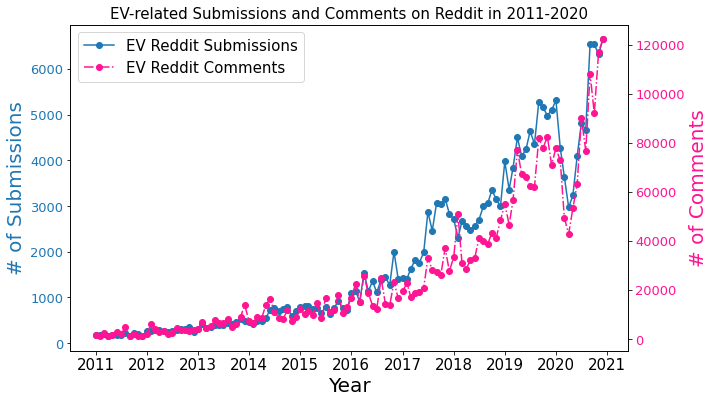

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'

fig, ax1 = plt.subplots(figsize=(10,6))

# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d[:120], monthly_RS[:120],linestyle='-',c=color,label='EV Reddit Submissions')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('# of Submissions', color=color, fontsize= 20)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 13)

ax2 = ax1.twinx()
color = 'deeppink'
lns2 = ax2.plot_date(d[:120], monthly_RC_ori[:120],linestyle='-.',c=color,label='EV Reddit Comments')
ax2.set_ylabel('# of Comments', color=color, fontsize= 20)
ax2.tick_params(axis='y', labelcolor=color, labelsize= 13)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 15},loc=0)
#plt.xticks(x,df_curr['Date'])
plt.title('EV-related Submissions and Comments on Reddit in 2011-2020', size=15)

fig.savefig('Number of EV-RCRS Monthly.png',
            format='png',
            dpi=100,
            bbox_inches='tight')

plt.show()


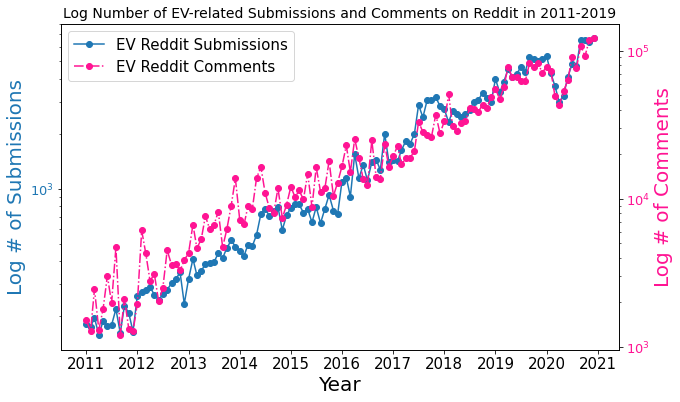

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# df['date'] = df['month'].map(str)+ '-' +df['year'].map(str)
# df['date'] = pd.to_datetime(df['date'], format='%m-%Y').dt.strftime('%m-%Y')
# fig, ax1 = plt.subplots(figsize=(15,9))
fig, ax1 = plt.subplots(figsize=(10,6))

# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
# color = 'black'
lns1 = ax1.plot_date(d[:120], monthly_RS[:120],linestyle='-',c=color,label='EV Reddit Submissions')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('Log # of Submissions', color=color, fontsize= 20)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 13)

ax2 = ax1.twinx()
color = 'deeppink'
lns2 = ax2.plot_date(d[:120], monthly_RC[:120],linestyle='-.',c=color,label='EV Reddit Comments')
ax2.set_ylabel('Log # of Comments', color=color, fontsize= 20)
ax2.tick_params(axis='y', labelcolor=color, labelsize= 13)
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs,loc=2, prop={'size': 15})
#plt.xticks(x,df_curr['Date'])
plt.title('Log Number of EV-related Submissions and Comments on Reddit in 2011-2019', size=14)
# fig.savefig('LogNumber of EV-RCRS Monthly.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')
plt.show()


# ax = fig.add_subplot(111)
# ax = plt.gca()
# ax.plot(time_bins, count_time, 'o', c='blue', alpha=0.53, markeredgecolor='none')
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.title('Response Time for @latimes Retweets', size=20)
# plt.xlabel('Response Time (log hours)', fontsize=16)
# plt.ylabel('# of Retweets', fontsize=16) 
# plt.yticks(fontsize=15)
# #plt.xticks(x,df_curr['Date'])
# plt.xticks(fontsize=15)

# ax2 = ax.twinx()  

# Sentiment analysis

## Prepare Corpus for LIWC(get_clean_title())

In [54]:
# custom_pipeline = [preprocessing.remove_urls
#                    , preprocessing.fillna
#                    , preprocessing.lowercase
#                    , preprocessing.remove_digits
#                    , preprocessing.remove_punctuation
#                    , preprocessing.remove_diacritics
#                    , preprocessing.remove_stopwords
#                    , preprocessing.remove_whitespace
#                    , preprocessing.stem]

custom_pipeline = [preprocessing.remove_urls
                   , preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]

def sent_to_words(sentence):
    
#     sentence = re.sub('\S*@\S*\s?', '', sentence)  # remove emails
#     sent = re.sub('\s+', ' ', sent)  # remove newline chars
#     sent = re.sub("\'", "", sent)  # remove single quotes
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence, flags=re.MULTILINE)
    sentence = gensim.utils.simple_preprocess(str(sentence), deacc=True) 
    return sentence 

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatize_sentence_spacy(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Lemmatization"""
    sent = sent_to_words(texts)
    
#     nlp = spacy.load('en', disable=['parser', 'ner'])
    doc = nlp(" ".join(sent)) 
    # texts_out = []
    texts_out = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    # remove stopwords once more after lemmatization
#     texts_out = [word for word in simple_preprocess(str(texts_out)) if word not in stop_words] 
#     texts_out = [word for word in simple_preprocess(str(texts_out))] 
    return " ".join(texts_out)


# def get_clean_title(df_1point5_reddit_subreddit,category='RC'):
#     if category=='RC':
#         df_1point5_reddit_subreddit_copy = df_1point5_reddit_subreddit.copy(deep=True)
#     #     df_3rd_reddit_subreddit_copy = df_3rd_reddit_subreddit.copy(deep=True)
#     #     df_reddit_subreddit_fightin = pd.concat([df_1point5_reddit_subreddit_copy,df_3rd_reddit_subreddit_copy])
#         df_reddit_subreddit_fightin = df_1point5_reddit_subreddit_copy
#         df_reddit_subreddit_fightin = df_reddit_subreddit_fightin.assign(body_expand=list(map(
#             lambda _:contractions.fix(_) if detect(_)=='en' else _, df_reddit_subreddit_fightin['body'])))
#         df_reddit_subreddit_fightin['clean_title'] = hero.clean(
#             df_reddit_subreddit_fightin['body_expand'], pipeline = custom_pipeline)
# #         df_reddit_subreddit_fightin['clean_title'] = df_reddit_subreddit_fightin['clean_title'].apply(
# #             lambda _:lemmatize_sentence_spacy(_))
#     else:
#         df_1point5_reddit_subreddit = df_1point5_reddit_subreddit.assign(f=list(
#             map(lambda _: utc.localize(_),df_1point5_phase_cp['created_at']))).sort_values('f').drop('f', axis=1)

#         df_1point5_reddit_subreddit_copy = df_1point5_reddit_subreddit.copy(deep=True)
#     #     df_3rd_reddit_subreddit_copy = df_3rd_reddit_subreddit.copy(deep=True)
#     #     df_reddit_subreddit_fightin = pd.concat([df_1point5_reddit_subreddit_copy,df_3rd_reddit_subreddit_copy])
#         df_reddit_subreddit_fightin = df_1point5_reddit_subreddit_copy
#         df_reddit_subreddit_fightin = df_reddit_subreddit_fightin.assign(body_expand=list(map(
#             lambda _:contractions.fix(_) if detect(_)=='en' else _, df_reddit_subreddit_fightin['merg'])))
#         df_reddit_subreddit_fightin['clean_title'] = hero.clean(
#             df_reddit_subreddit_fightin['body_expand'], pipeline = custom_pipeline)
# #         df_reddit_subreddit_fightin['clean_title'] = df_reddit_subreddit_fightin['clean_title'].apply(
# #             lambda _:lemmatize_sentence_spacy(_))
#     return df_reddit_subreddit_fightin['clean_title']

def get_clean_title(df_1point5_reddit_subreddit,category='RC'):
    if category=='RC':
        df_1point5_reddit_subreddit_copy = df_1point5_reddit_subreddit.copy(deep=True)
    #     df_3rd_reddit_subreddit_copy = df_3rd_reddit_subreddit.copy(deep=True)
    #     df_reddit_subreddit_fightin = pd.concat([df_1point5_reddit_subreddit_copy,df_3rd_reddit_subreddit_copy])
        df_reddit_subreddit_fightin = df_1point5_reddit_subreddit_copy
#         df_reddit_subreddit_fightin = df_reddit_subreddit_fightin.assign(body_expand=list(map(
#             lambda _:contractions.fix(_) if detect(_)=='en' else _, df_reddit_subreddit_fightin['body'])))
        df_reddit_subreddit_fightin['clean_title'] = hero.clean(
            df_reddit_subreddit_fightin['body'], pipeline = custom_pipeline)
#         df_reddit_subreddit_fightin['clean_title'] = df_reddit_subreddit_fightin['clean_title'].apply(
#             lambda _:lemmatize_sentence_spacy(_))
    else:
#         df_1point5_reddit_subreddit = df_1point5_reddit_subreddit.assign(f=list(
#             map(lambda _: utc.localize(_),df_1point5_phase_cp['created_at']))).sort_values('f').drop('f', axis=1)

        df_1point5_reddit_subreddit_copy = df_1point5_reddit_subreddit.copy(deep=True)
    #     df_3rd_reddit_subreddit_copy = df_3rd_reddit_subreddit.copy(deep=True)
    #     df_reddit_subreddit_fightin = pd.concat([df_1point5_reddit_subreddit_copy,df_3rd_reddit_subreddit_copy])
        df_reddit_subreddit_fightin = df_1point5_reddit_subreddit_copy
#         df_reddit_subreddit_fightin = df_reddit_subreddit_fightin.assign(body_expand=list(map(
#             lambda _:contractions.fix(_) if detect(_)=='en' else _, df_reddit_subreddit_fightin['merg'])))
        df_reddit_subreddit_fightin['clean_title'] = hero.clean(
            df_reddit_subreddit_fightin['merg'], pipeline = custom_pipeline)
#         df_reddit_subreddit_fightin['clean_title'] = df_reddit_subreddit_fightin['clean_title'].apply(
#             lambda _:lemmatize_sentence_spacy(_))
    return df_reddit_subreddit_fightin['clean_title']

In [55]:
# get_clean_title(refine_RC(df_reddit_extend)).to_csv('df_reddit_extend.csv',index=False,header=None)
# pd.read_csv("df_reddit_extend.csv",header=None).shape, df_reddit_extend.shape

## Construct df_reddit_extendLIWC

In [56]:
df_reddit_extendLIWC = pd.read_csv('LIWC2015_Results_df_reddit_extend.csv')
df_reddit_extendLIWC.shape

(3162938, 94)

## LIWC Scores

In [57]:
# months_lst
df_reddit_extend.shape,df_reddit_extendLIWC.shape

((3162938, 75), (3162938, 94))

## Function: VADER/AFFINE/TEXTBLOB

In [58]:
df_reddit_extend.columns

Index(['score', 'name', 'author', 'subreddit_id', 'author_flair_text',
       'parent_id', 'created_utc', 'controversiality', 'subreddit', 'edited',
       'retrieved_on', 'distinguished', 'gilded', 'ups', 'body',
       'author_flair_css_class', 'id', 'downs', 'link_id', 'score_hidden',
       'archived', 'month', 'removal_reason', 'saved', 'banned_by',
       'user_reports', 'likes', 'approved_by', 'report_reasons', 'mod_reports',
       'created', 'num_reports', 'replies', 'body_html', 'stickied',
       'author_cakeday', 'can_gild', 'approved_at_utc', 'can_mod_post',
       'collapsed', 'collapsed_reason', 'banned_at_utc', 'is_submitter',
       'permalink', 'subreddit_type', 'mod_note', 'mod_reason_by',
       'mod_reason_title', 'no_follow', 'send_replies',
       'author_flair_template_id', 'author_flair_background_color',
       'author_flair_richtext', 'author_flair_text_color', 'author_flair_type',
       'rte_mode', 'author_created_utc', 'author_fullname',
       'subreddit_

In [59]:
sid_obj = SentimentIntensityAnalyzer()

# nonRT_beforeReport_vader = nonRT_beforeReport_phase.full_text.apply(lambda
#                                                                     _:sid_obj.polarity_scores(_)['compound'])

# nonRT_afterReport_vader = nonRT_afterReport_phase.full_text.apply(lambda
#                                                                     _:sid_obj.polarity_scores(_)['compound'])

sid_obj.polarity_scores('i HATE THE DOG')

get_VADER = lambda _:sid_obj.polarity_scores(_)['compound']
get_VADER('i HATE THE DOG')

-0.6633

In [60]:
from afinn import Afinn
afinn = Afinn()
get_afinn = lambda _:afinn.score(_)

get_afinn("i HATE THE DOG")

-3.0

In [61]:
from textblob import TextBlob
get_blobPolarity = lambda _:TextBlob(_).sentiment.polarity
get_blobSubjectivity = lambda _:TextBlob(_).sentiment.subjectivity

get_blobPolarity("i HATE THE DOG"), get_blobSubjectivity("i HATE THE DOG")

(-0.8, 0.9)

In [62]:
# monthlyafinn_lst = [df_reddit_extend[df_reddit_extend.month==_].
#                 body.apply(lambda _:get_afinn(_)).mean() for _ in months_lst]

# import pickle
# with open('monthlyafinn.pkl', 'wb') as f:
#     pickle.dump(monthlyafinn_lst, f)


# monthlyVADER_lst = [df_reddit_extend[df_reddit_extend.month==_].
#                 body.apply(lambda _:get_VADER(_)).mean() for _ in months_lst]

# import pickle
# with open('monthlyVADER.pkl', 'wb') as f:
#     pickle.dump(monthlyVADER_lst, f)
    
# # monthlyVADER_lst

# monthlyPolarity_lst = [df_reddit_extend[df_reddit_extend.month==_].
#                        body.apply(lambda _:get_blobPolarity(_)).mean() for _ in months_lst]

# monthlySubjectivity_lst = [df_reddit_extend[df_reddit_extend.month==_].
#                            body.apply(lambda _:get_blobSubjectivity(_)).mean() for _ in months_lst]

# import pickle
# with open('monthlyPolarity.pkl', 'wb') as f:
#     pickle.dump(monthlyPolarity_lst, f)
    
# with open('monthlySubjectivity.pkl', 'wb') as f:
#     pickle.dump(monthlySubjectivity_lst, f)
    
# monthlyPolarity_lst, monthlySubjectivity_lst

## Construct EV Sentiment Socres

In [63]:
# np.mean(random_VADER),np.mean(newmonthlyVADER_lst),\
# # random_VADER

import pickle
with open('monthlyafinn.pkl', 'rb') as f:  
    monthlyAFFIN_lst = pickle.load(f)
    
with open('monthlyPolarity.pkl', 'rb') as f:  
    monthlyPolarity_lst = pickle.load(f)
    
with open('monthlySubjectivity.pkl', 'rb') as f:  
    monthlySubjectivity_lst = pickle.load(f)

with open('monthlyVADER.pkl', 'rb') as f:  
    newmonthlyVADER_lst = pickle.load(f)
    
# monthlyPolarity_lst, monthlySubjectivity_lst

## Construct Sampled Sentiment Scores

In [65]:
# "dic_senti.pkl"
import pickle
with open('dic_senti.pkl', 'rb') as f:  
    dic_senti = pickle.load(f)
    
# dic_senti ['VADER']

In [66]:
random_VADER = dic_senti ['VADER']
random_AFINN = dic_senti ['AFINN']
random_Polarity = dic_senti ['Polarity']

In [67]:
np.mean(random_VADER),np.mean(newmonthlyVADER_lst),

(0.13361682356445173, 0.20810745597334773)

## Construct Overall EV VADER Scores

In [68]:
# with open('OverallVADER_lst.pkl', 'wb') as f:  
#     pickle.dump(list(OverallVADER_lst),f)
    
with open('OverallVADER_lst.pkl', 'rb') as f:  
    OverallVADER_lst = pickle.load(f)

len(OverallVADER_lst),OverallVADER_lst[:3]

(2197337, [0.2211, 0.4325, 0.8658])

## Monthly EV Textblob Plot

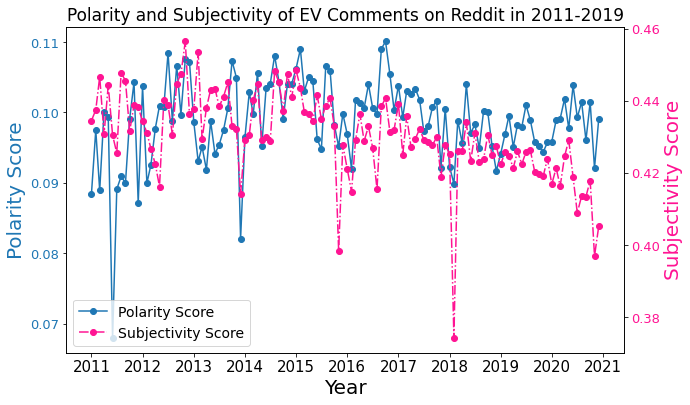

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'

fig, ax1 = plt.subplots(figsize=(10,6))

# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d, monthlyPolarity_lst,linestyle='-',c=color,label='Polarity Score')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('Polarity Score', color=color, fontsize= 20)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 13)

ax2 = ax1.twinx()
color = 'deeppink'
lns2 = ax2.plot_date(d, monthlySubjectivity_lst,linestyle='-.',c=color,label='Subjectivity Score')
ax2.set_ylabel('Subjectivity Score', color=color, fontsize= 20)
ax2.tick_params(axis='y', labelcolor=color, labelsize= 13)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 14},loc=3)
#plt.xticks(x,df_curr['Date'])
plt.title('Polarity and Subjectivity of EV Comments on Reddit in 2011-2019', size=17)

# fig.savefig('Number of EV-RCRS Monthly.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()


## Monthly EV LIWC Tone Plot

In [70]:
monthlyLIWC_lst = [df_reddit_extendLIWC[df_reddit_extend.month==_].Tone.mean() for _ in months_lst]

In [71]:
df_reddit_extendLIWC.shape,df_reddit_extend.shape
# del df_reddit_extend

((3162938, 94), (3162938, 75))

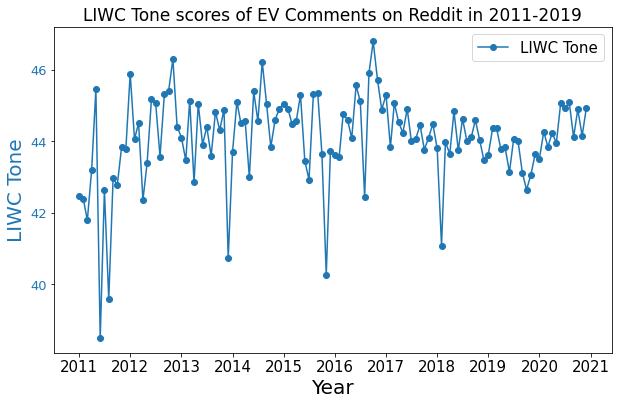

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'

fig, ax1 = plt.subplots(figsize=(10,6))

# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d, monthlyLIWC_lst,linestyle='-',c=color,label='LIWC Tone')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('LIWC Tone', color=color, fontsize= 20)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 13)

# ax2 = ax1.twinx()
# color = 'deeppink'
# lns2 = ax2.plot_date(d, monthly_RC,linestyle='-.',c=color,label='EV Reddit Comments')
# ax2.set_ylabel('# of Comments', color=color, fontsize= 20)
# ax2.tick_params(axis='y', labelcolor=color, labelsize= 13)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
lns = lns1
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 15},loc=0)
#plt.xticks(x,df_curr['Date'])
plt.title('LIWC Tone scores of EV Comments on Reddit in 2011-2019', size=17)

# fig.savefig('Number of EV-RCRS Monthly.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()


## Normalized Sentiment Scores

In [73]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

NormalizeData(monthlyPolarity_lst)

array([0.48541426, 0.70124003, 0.49739934, 0.76337425, 0.74447384,
       0.        , 0.50182999, 0.5451682 , 0.52274273, 0.73924563,
       0.86206788, 0.45503786, 0.8482142 , 0.52218652, 0.58488505,
       0.70643796, 0.78329267, 0.77995839, 0.96127136, 0.73159017,
       0.91837593, 0.75323696, 0.93994503, 0.93142255, 0.72759047,
       0.59590705, 0.64461823, 0.56727422, 0.73114037, 0.62146075,
       0.65146718, 0.70070687, 0.77462409, 0.93459374, 0.87816948,
       0.33506219, 0.67618769, 0.8287442 , 0.7547016 , 0.89473358,
       0.64734665, 0.84230275, 0.85791534, 0.95216945, 0.86442224,
       0.7396804 , 0.85819293, 0.85736506, 0.90812572, 0.97456953,
       0.83266424, 0.87973248, 0.86523273, 0.66940586, 0.63692259,
       0.91680724, 0.90175626, 0.71885425, 0.64587921, 0.75639393,
       0.6879064 , 0.57065185, 0.80410181, 0.79362322, 0.77493604,
       0.85525491, 0.77570582, 0.75422739, 0.97525852, 1.        ,
       0.8898846 , 0.76800468, 0.8506914 , 0.74475116, 0.83275

In [74]:
months_lst[::12],months_lst[12:24],len(months_lst)//12
[(12*(_-1),12*_) if 12*_<=len(months_lst) else ((12*(_-1),len(months_lst))) for _ in range(1,len(months_lst)//12+1)]
[_.split('-')[0] for _ in months_lst[::12]]

['2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mydata = pd.DataFrame({
    'a':[2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020],
    'v':[383.00, 519.00, 366.00, 436.00, 1348.00, 211.00, 139.00, 614.00, 365.00, 365.00, 383.00, 602.00, 994.00, 719.00, 589.00, 365.00, 990.00, 1142.00, 262.00, 1263.00, 507.00, 222.00, 363.00, 274.00, 195.00, 730.00, 730.00, 592.00, 479.00, 607.00, 292.00, 657.00, 453.00, 691.00, 673.00, 705]
})

# means =mydata.groupby('a').v.mean().reset_index()
# mydata,means
pd.DataFrame(list(zip(['2011','2012'],[[1,2,3],[4,5,6]])))
# pd.DataFrame([['2011','2012'],[[1,2,3],[4,5,6]]])

x = [[1],[1,2]]
sum(x,[]),[1]*3

([1, 1, 2], [1, 1, 1])

In [76]:
months_lst = [_.split('/')[-1].split('.')[0] for _ in EV_RC_files]
months_lst = [dparser.parse(_.split('/')[-1].split('.')[0],fuzzy=True).strftime("%Y-%m") for _ in months_lst]
months_lst[:3]
years_lst = [_.split('-')[0] for _ in months_lst[::12]]


test = df_reddit_extend.sample(frac=0.0015, random_state=1)

from afinn import Afinn
afinn = Afinn()
get_afinn = lambda _:afinn.score(_)

get_afinn("i HATE THE DOG")

-3.0

In [77]:
index_pairs = [(12*(_-1),12*_) if 12*_<=len(months_lst) else ((12*(_-1),len(months_lst))) for _ in range(1,len(months_lst)//12+1)]

yearly_afinn_lst = []
for start,end in index_pairs:
    yearly_afinn_lst.append(test[test.month.isin(months_lst[start:end])].body.apply
                             (lambda _:get_afinn(_)).values.tolist())

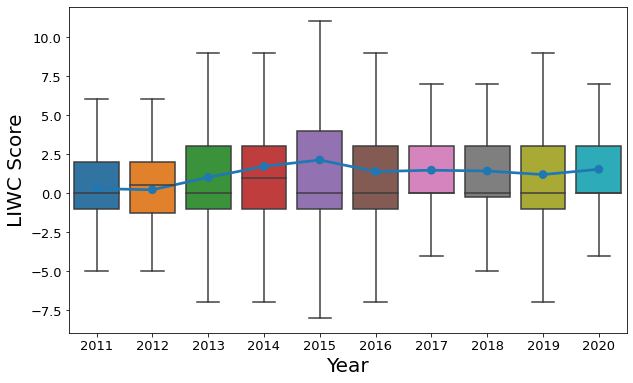

In [78]:
extend_years_lst = [[year]*len(afinn_lst) for (year,afinn_lst) in zip(years_lst,yearly_afinn_lst)]
extend_years_lst = sum(extend_years_lst,[])

extend_yearly_afinn_lst = sum(yearly_afinn_lst,[])
yearly_afinn_df =pd.DataFrame({
    'Year':extend_years_lst,
    'Afinn':extend_yearly_afinn_lst
})
means =yearly_afinn_df.groupby('Year').Afinn.mean().reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=yearly_afinn_df, x='Year', y='Afinn', ax=ax, showfliers=False)
sns.pointplot(data=means, x='Year', y='Afinn', ax=ax) 
ax.set_xlabel('Year', fontsize= 20)
ax.set_ylabel('LIWC Score', fontsize= 20)
ax.tick_params(axis='x', labelsize= 13)
ax.tick_params(axis='y', labelsize= 13)
plt.show()

In [80]:
len(sum(yearly_afinn_lst,[]))

4744

### Normalized Monthly VADER/LIWC Plot

In [81]:
monthlyLIWC_lst = [df_reddit_extendLIWC[df_reddit_extend.month==_].Tone.mean() for _ in months_lst]

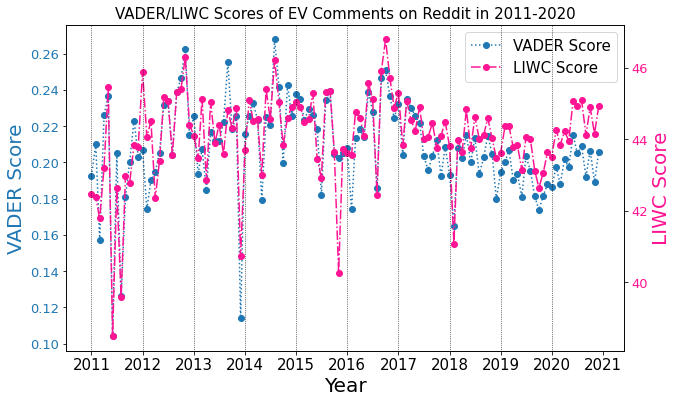

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'

fig, ax1 = plt.subplots(figsize=(10,6))

monthlyPolarity_lst_rec = NormalizeData(monthlyPolarity_lst)
newmonthlyVADER_lst_rec = NormalizeData(newmonthlyVADER_lst)
monthlyLIWC_lst_rec = NormalizeData(monthlyLIWC_lst)
monthlyAFFIN_lst_rec = NormalizeData(monthlyAFFIN_lst)
# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d, newmonthlyVADER_lst,linestyle=':',c=color,label='VADER Score')
# lns3 = ax1.plot_date(d, monthlyPolarity_lst_rec,linestyle='-',c='black',label='Polarity Score')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('VADER Score', color=color, fontsize= 20)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 13)

ax2 = ax1.twinx()
color = 'deeppink'
lns2 = ax2.plot_date(d, monthlyLIWC_lst,linestyle='-.',c=color,label='LIWC Score')
ax2.set_ylabel('LIWC Score', color=color, fontsize= 20)
ax2.tick_params(axis='y', labelcolor=color, labelsize= 13)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
# lns = lns1 + lns2 + lns3
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 15},loc=0)
#plt.xticks(x,df_curr['Date'])

for end_y in d[::12]:
    plt.axvline(x= end_y, color = 'black',linestyle = ':', linewidth=.7)
    
plt.title('VADER/LIWC Scores of EV Comments on Reddit in 2011-2020', size=15)

# fig.savefig('Monthly VADER_LIWC_Polarity Scores.jpg',
#             format='jpg',
#             dpi=100,
#             bbox_inches='tight')
plt.show()

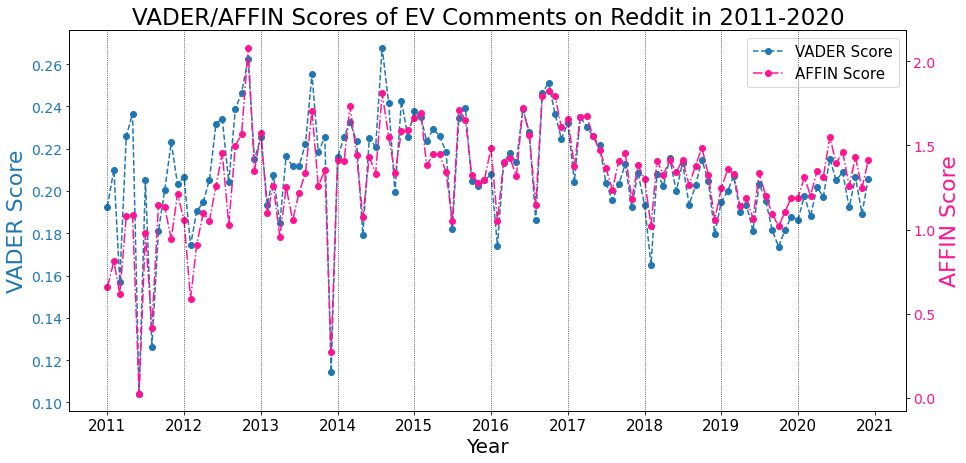

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'

fig, ax1 = plt.subplots(figsize=(15,7))

monthlyPolarity_lst_rec = NormalizeData(monthlyPolarity_lst)
newmonthlyVADER_lst_rec = NormalizeData(newmonthlyVADER_lst)
monthlyLIWC_lst_rec = NormalizeData(monthlyLIWC_lst)
monthlyAFFIN_lst_rec = NormalizeData(monthlyAFFIN_lst)
# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d, newmonthlyVADER_lst,linestyle='--',c=color,label='VADER Score')
# lns3 = ax1.plot_date(d, monthlyPolarity_lst_rec,linestyle='-',c='black',label='Polarity Score')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('VADER Score', color=color, fontsize= 22)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 14)

ax2 = ax1.twinx()
color = 'deeppink'
lns2 = ax2.plot_date(d, monthlyAFFIN_lst,linestyle='-.',c=color,label='AFFIN Score')
ax2.set_ylabel('AFFIN Score', color=color, fontsize= 22)
ax2.tick_params(axis='y', labelcolor=color, labelsize= 14)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
# lns = lns1 + lns2 + lns3
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 15},loc=0)
#plt.xticks(x,df_curr['Date'])
# for end_y in [_ for _ in d if "-12-01" in str(_)]:
for end_y in d[::12]:
    plt.axvline(x= end_y, color = 'black',linestyle = ':', linewidth=.7)
# plt.axvline(x= d[-1], color = 'black',linestyle = ':', linewidth=.7)
#     plt.axvline(x= x[count_MainShoc_ind-1], color = 'green',linestyle = ':',label = 'M-7.1 Mainshock')

plt.title('VADER/AFFIN Scores of EV Comments on Reddit in 2011-2020', size=23)

fig.savefig('Monthly_VADER_AFFINScores_wider.jpg',
            format='jpg',
            dpi=400,
            bbox_inches='tight')
plt.show()

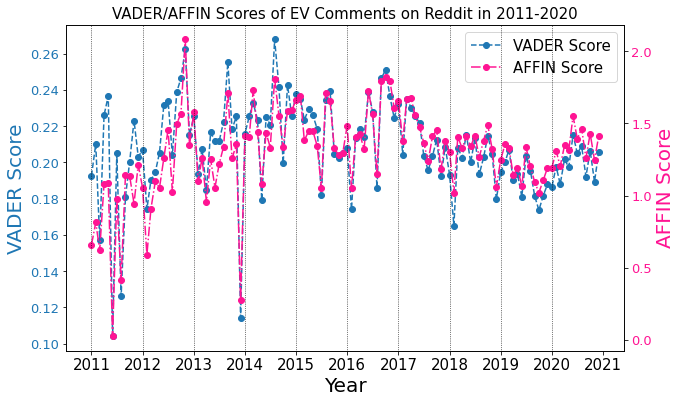

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'

fig, ax1 = plt.subplots(figsize=(10,6))

monthlyPolarity_lst_rec = NormalizeData(monthlyPolarity_lst)
newmonthlyVADER_lst_rec = NormalizeData(newmonthlyVADER_lst)
monthlyLIWC_lst_rec = NormalizeData(monthlyLIWC_lst)
monthlyAFFIN_lst_rec = NormalizeData(monthlyAFFIN_lst)
# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d, newmonthlyVADER_lst,linestyle='--',c=color,label='VADER Score')
# lns3 = ax1.plot_date(d, monthlyPolarity_lst_rec,linestyle='-',c='black',label='Polarity Score')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('VADER Score', color=color, fontsize= 20)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 13)

ax2 = ax1.twinx()
color = 'deeppink'
lns2 = ax2.plot_date(d, monthlyAFFIN_lst,linestyle='-.',c=color,label='AFFIN Score')
ax2.set_ylabel('AFFIN Score', color=color, fontsize= 20)
ax2.tick_params(axis='y', labelcolor=color, labelsize= 13)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
# lns = lns1 + lns2 + lns3
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 15},loc=0)
#plt.xticks(x,df_curr['Date'])
# for end_y in [_ for _ in d if "-12-01" in str(_)]:
for end_y in d[::12]:
    plt.axvline(x= end_y, color = 'black',linestyle = ':', linewidth=.7)
# plt.axvline(x= d[-1], color = 'black',linestyle = ':', linewidth=.7)
#     plt.axvline(x= x[count_MainShoc_ind-1], color = 'green',linestyle = ':',label = 'M-7.1 Mainshock')

plt.title('VADER/AFFIN Scores of EV Comments on Reddit in 2011-2020', size=15)

fig.savefig('Monthly VADER_AFFINScores.jpg',
            format='jpg',
            dpi=400,
            bbox_inches='tight')
plt.show()

In [85]:
d[::12],[_ for _ in d if "-12-01" in str(_)]

(DatetimeIndex(['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
                '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
                '2019-01-01', '2020-01-01'],
               dtype='datetime64[ns]', freq='12MS'),
 [Timestamp('2011-12-01 00:00:00', freq='MS'),
  Timestamp('2012-12-01 00:00:00', freq='MS'),
  Timestamp('2013-12-01 00:00:00', freq='MS'),
  Timestamp('2014-12-01 00:00:00', freq='MS'),
  Timestamp('2015-12-01 00:00:00', freq='MS'),
  Timestamp('2016-12-01 00:00:00', freq='MS'),
  Timestamp('2017-12-01 00:00:00', freq='MS'),
  Timestamp('2018-12-01 00:00:00', freq='MS'),
  Timestamp('2019-12-01 00:00:00', freq='MS'),
  Timestamp('2020-12-01 00:00:00', freq='MS')])

In [86]:
str(d[12])

'2012-01-01 00:00:00'

### Normalized Monthly VADER/LIWC/Polarity/AFFIN

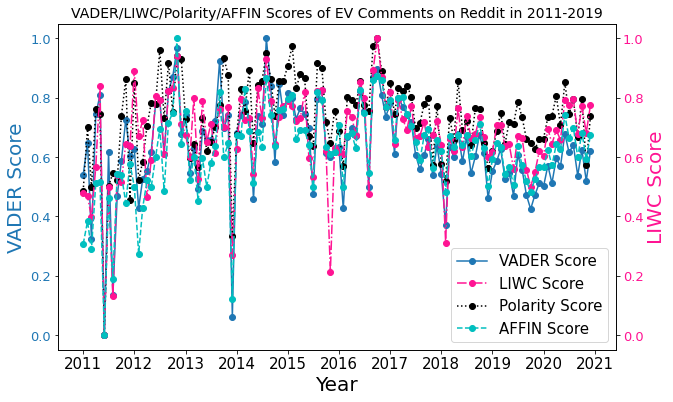

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='svg'

fig, ax1 = plt.subplots(figsize=(10,6))

monthlyPolarity_lst_rec = NormalizeData(monthlyPolarity_lst)
newmonthlyVADER_lst_rec = NormalizeData(newmonthlyVADER_lst)
monthlyLIWC_lst_rec = NormalizeData(monthlyLIWC_lst)
monthlyAFFIN_lst_rec = NormalizeData(monthlyAFFIN_lst)
# plt.plot_date(d, monthly_RC,linestyle='-')
color = 'tab:blue'
lns1 = ax1.plot_date(d, newmonthlyVADER_lst_rec,linestyle='-',c=color,label='VADER Score')
lns3 = ax1.plot_date(d, monthlyPolarity_lst_rec,linestyle=':',c='black',label='Polarity Score')
ax1.set_xlabel('Year', fontsize= 20)
ax1.set_ylabel('VADER Score', color=color, fontsize= 20)
ax1.tick_params(axis='y', labelcolor=color, labelsize= 13)

ax2 = ax1.twinx()
color = 'deeppink'
lns2 = ax2.plot_date(d, monthlyLIWC_lst_rec,linestyle='-.',c=color,label='LIWC Score')
lns4 = ax2.plot_date(d, monthlyAFFIN_lst_rec,linestyle='--',c='c',label='AFFIN Score')
ax2.set_ylabel('LIWC Score', color=color, fontsize= 20)
ax2.tick_params(axis='y', labelcolor=color, labelsize= 13)
# ax.set_yscale('log')
# ax2.set_yscale('log')

ax1.tick_params(axis='x', labelsize= 15) 
# added these two lines
lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop={'size': 15},loc=0)
#plt.xticks(x,df_curr['Date'])
plt.title('VADER/LIWC/Polarity/AFFIN Scores of EV Comments on Reddit in 2011-2019', size=14)

# fig.savefig('Monthly VADER_LIWC_Polarity_AFFIN Scores.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()

# Sentiment CDF and Clustering

## Construct dic_subredditVADER

In [88]:
import pickle
with open("dic_subredditVADER.pkl","rb") as f:
    dic_subredditVADER = pickle.load(f)
    
# OverallVADER_lst.pkl

with open("OverallVADER_lst.pkl","rb") as f:
    OverallVADER_lst = pickle.load(f)
    
dic_subredditVADER['Overall'] = OverallVADER_lst

# dic_subredditAFINN.pkl
with open("dic_subredditAFINN.pkl","rb") as f:
    dic_subredditAFINN = pickle.load(f)

## Hierarchical Clustering

In [89]:
# dic_subredditVADER['space']
# vader_The_Donald.tolist()
from scipy.stats import wasserstein_distance
wasserstein_distance(dic_subredditVADER['conspiracy'],dic_subredditVADER['politics'])

0.10119093103613222

In [90]:
df_reddit_extend.subreddit.value_counts()[:100].keys().tolist().index("electriccars")
df_reddit_extend.subreddit.value_counts()[:100].keys().tolist()[:52]

['electricvehicles',
 'teslamotors',
 'Futurology',
 'cars',
 'technology',
 'worldnews',
 'wallstreetbets',
 'RealTesla',
 'AskReddit',
 'stocks',
 'politics',
 'investing',
 'energy',
 'canada',
 'news',
 'todayilearned',
 'spacex',
 'science',
 'teslainvestorsclub',
 'leaf',
 'BoltEV',
 'IAmA',
 'SPACs',
 'explainlikeimfive',
 'europe',
 'australia',
 'videos',
 'volt',
 'newzealand',
 'ukpolitics',
 'unpopularopinion',
 'unitedkingdom',
 'whatcarshouldIbuy',
 'personalfinance',
 'pennystocks',
 'collapse',
 'changemyview',
 'funny',
 'TeslaLounge',
 'pics',
 'The_Donald',
 'TeslaModel3',
 'environment',
 'tech',
 'Showerthoughts',
 'EnoughMuskSpam',
 'ontario',
 'AmItheAsshole',
 'CanadaPolitics',
 'NoStupidQuestions',
 'electriccars',
 'conspiracy']

### Clustering:VADER Distance

In [91]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import wasserstein_distance
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage

def get_distance(sub1,sub2):
    vader_sub1 = dic_subredditVADER[sub1]
    vader_sub2 = dic_subredditVADER[sub2]
    return wasserstein_distance(vader_sub1,vader_sub2)

num = 52
subreddit_lst = df_reddit_extend.subreddit.value_counts()[:num].keys().tolist()
# added = ["Overall","Conservative","conspiracy"]
added = ["Overall","PoliticalDiscussion"]
subreddit_lst.extend(added)
num += len(added)
dist_matrix = np.mat(np.zeros((num, num)))
for i in range(num):
    for j in range(i, num):
        distence = get_distance(subreddit_lst[i], subreddit_lst[j])
        dist_matrix[i, j] = distence
        dist_matrix[j, i] = dist_matrix[i, j]
        
model = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average')
clustering2 = model.fit(dist_matrix)

print("自定义距离矩阵聚类方式：")
print("每个数据所属的簇编号：", clustering2.labels_)
print("每个簇的成员：", clustering2.children_)

# 调整距离矩阵的形状
dist_matrix = dist.squareform(dist_matrix)

# linkage方法用于计算两个聚类簇s和t之间的距离d(s,t)
# 层次聚类编码为一个linkage矩阵。
Z = linkage(dist_matrix, 'average')
print("聚类过程：", Z)

# 将层级聚类结果以树状图表示出来
# fig = plt.figure(figsize=(5, 3))
# dn = dendrogram(Z)
# plt.show()

自定义距离矩阵聚类方式：
每个数据所属的簇编号： [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 0 0]
每个簇的成员： [[ 19  38]
 [ 13  25]
 [  5  14]
 [  1  12]
 [ 31  46]
 [  7  29]
 [  2  43]
 [ 24  55]
 [ 11  57]
 [ 18  23]
 [ 15  37]
 [ 20  54]
 [ 30  40]
 [ 58  59]
 [  3  52]
 [  4  60]
 [ 39  67]
 [ 27  41]
 [  8  56]
 [ 61  69]
 [ 26  70]
 [  0   9]
 [ 28  68]
 [ 34  50]
 [ 65  71]
 [ 72  74]
 [ 62  63]
 [ 49  76]
 [ 22  77]
 [ 73  79]
 [ 10  45]
 [ 21  82]
 [ 17  75]
 [  6  44]
 [ 42  48]
 [ 80  81]
 [ 64  83]
 [ 85  86]
 [ 32  33]
 [ 35  51]
 [ 66  90]
 [ 36  53]
 [ 89  91]
 [ 84  88]
 [ 94  96]
 [ 78  92]
 [ 47  93]
 [ 95  97]
 [ 16  87]
 [ 98 101]
 [ 99 103]
 [102 104]
 [100 105]]
聚类过程： [[1.90000000e+01 3.80000000e+01 5.24691936e-03 2.00000000e+00]
 [1.30000000e+01 2.50000000e+01 5.68887288e-03 2.00000000e+00]
 [5.00000000e+00 1.40000000e+01 6.02591017e-03 2.00000000e+00]
 [1.00000000e+00 1.20000000e+01 6.42381466e-03 2.00000000e+00]
 [3.10000000e+

In [92]:
# model = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average')
# clustering2 = model.fit(dist_matrix)

# print("自定义距离矩阵聚类方式：")
# print("每个数据所属的簇编号：", clustering2.labels_)
# print("每个簇的成员：", clustering2.children_)

# # 调整距离矩阵的形状
# dist_matrix = dist.squareform(dist_matrix)

# # linkage方法用于计算两个聚类簇s和t之间的距离d(s,t)
# # 层次聚类编码为一个linkage矩阵。
# Z = linkage(dist_matrix, 'average')
# print("聚类过程：", Z)

# # 将层级聚类结果以树状图表示出来
# # fig = plt.figure(figsize=(5, 3))
# # dn = dendrogram(Z)
# # plt.show()

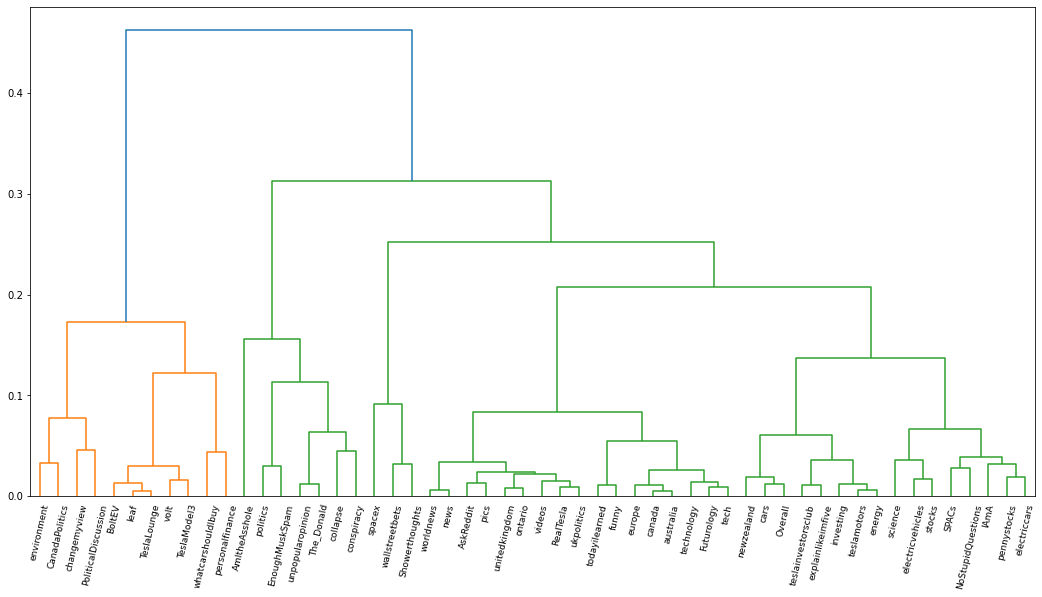

In [93]:
# 将层级聚类结果以树状图表示出来

Z = linkage(dist_matrix, 'ward')
# plt.style.use('classic')
# plt.style.use(['science','no-latex'])
# fig = plt.figure(figsize=(12.5,6))
fig = plt.figure(figsize=(18,9))
dn = dendrogram(Z, labels=subreddit_lst,leaf_rotation=77, leaf_font_size=9)
# fig.savefig('Clustering_Subreddits.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()

In [94]:
# clustering2.children_
# # [np.array(subreddit_lst)[_] for _ in clustering2.children_]
# # len(subreddit_lst)

### Facny Dendrogram

In [95]:
def fancy_dendrogram(*args, **kwargs):
	max_d = kwargs.pop('max_d', None)
	if max_d and 'color_threshold' not in kwargs:
		kwargs['color_threshold'] = max_d
	annotate_above = kwargs.pop('annotate_above', 0)

	ddata = dendrogram(*args, **kwargs)

	if not kwargs.get('no_plot', False):
		plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize=17)
# 		plt.xlabel('Subreddits', fontsize=15)
		plt.ylabel('Wasserstein Distance', fontsize=15)
		plt.yticks(fontsize= 13)
		for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			if y > annotate_above:
				plt.plot(x, y, 'o', c=c)
				plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
		if max_d:
			plt.axhline(y=max_d, c='c')
	return ddata

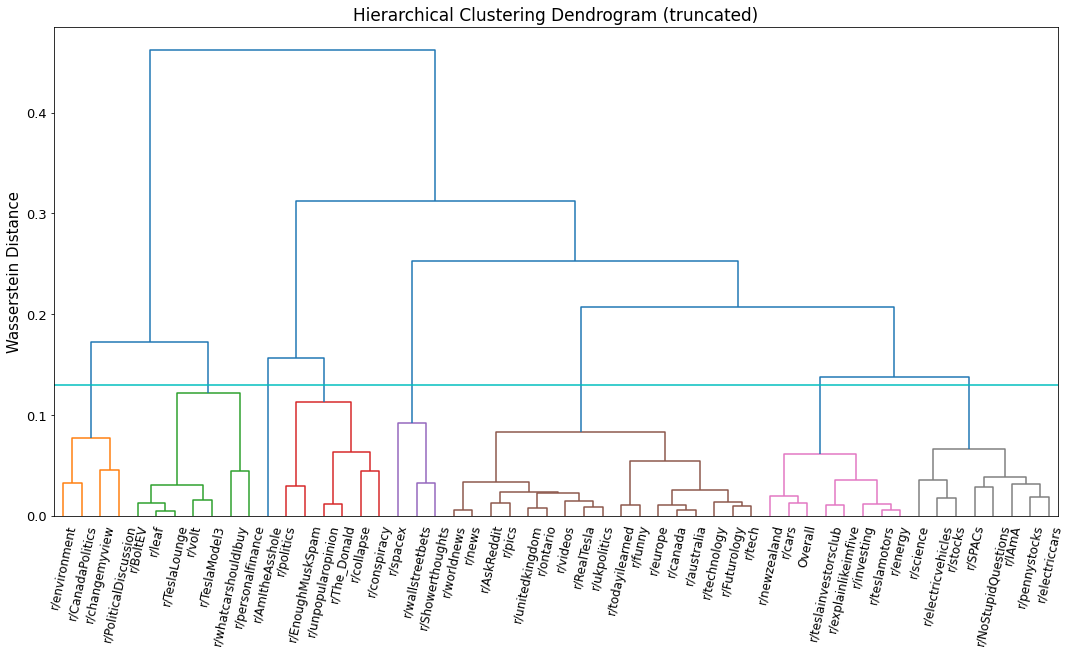

In [96]:
# fig = plt.figure(figsize=(12, 6))
# fancy_dendrogram(Z, truncate_mode='lastp', p=21, labels=subreddit_lst,
#                  leaf_rotation=65., leaf_font_size=12., show_contracted=True, annotate_above=10)

# fig = plt.figure(figsize=(12.7,6))
fig = plt.figure(figsize=(18,9))
fancy_dendrogram(Z, truncate_mode='lastp', p=54, labels=['r/'+_ if _ != "Overall" else _ for _ in subreddit_lst],
                 leaf_rotation=78., leaf_font_size=12., show_contracted=True, annotate_above=10,max_d=0.13)

# fig.savefig('Clustering_Subreddits_fancy.jpg',
#             format='jpg',
#             dpi=400,
#             bbox_inches='tight')
plt.show()

['environment',
 'CanadaPolitics',
 'changemyview',
 'PoliticalDiscussion',
 'BoltEV',
 'leaf',
 'TeslaLounge',
 'volt',
 'TeslaModel3',
 'whatcarshouldIbuy',
 'personalfinance',
 'AmItheAsshole',
 'politics',
 'EnoughMuskSpam',
 'unpopularopinion',
 'The_Donald',
 'collapse',
 'conspiracy',
 'spacex',
 'wallstreetbets',
 'Showerthoughts',
 'worldnews',
 'news',
 'AskReddit',
 'pics',
 'unitedkingdom',
 'ontario',
 'videos',
 'RealTesla',
 'ukpolitics',
 'todayilearned',
 'funny',
 'europe',
 'canada',
 'australia',
 'technology',
 'Futurology',
 'tech',
 'newzealand',
 'cars',
 'Overall',
 'teslainvestorsclub',
 'explainlikeimfive',
 'investing',
 'teslamotors',
 'energy',
 'science',
 'electricvehicles',
 'stocks',
 'SPACs',
 'NoStupidQuestions',
 'IAmA',
 'pennystocks',
 'electriccars']

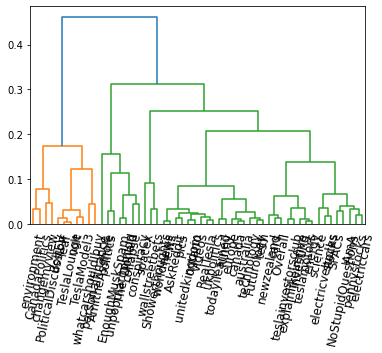

In [97]:
ddata = dendrogram(Z, truncate_mode='lastp', p=54, labels=subreddit_lst,
                 leaf_rotation=78., leaf_font_size=12., show_contracted=True)

    
ddata['ivl']

In [98]:
# fig = plt.figure(figsize=(12, 6))
# fancy_dendrogram(Z_embedding, truncate_mode='lastp', p=15, labels=subreddit_lst, 
#                  leaf_rotation=45., leaf_font_size=12., show_contracted=True, annotate_above=10)
# plt.show()

In [99]:
# 21:26:11 2021-06-01

# Toic Modeling: Mallet LDA

In [100]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['http','https'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import enchant
d = enchant.Dict("en_US")

In [101]:
def sent_to_words(sentence):
    
#     sentence = re.sub('\S*@\S*\s?', '', sentence)  # remove emails
#     sent = re.sub('\s+', ' ', sent)  # remove newline chars
#     sent = re.sub("\'", "", sent)  # remove single quotes
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence, flags=re.MULTILINE)
    sentence = gensim.utils.simple_preprocess(str(sentence), deacc=True) 
#     return [_ for _ in sentence if _ in words.words()]
    return [_ for _ in sentence if d.check(_)]


def process_words(texts,bigram_mod, trigram_mod,
                  stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    
    print("--------------process_words loop--------------")
    for index,sent in enumerate(texts):
        if index%40000==0:
            print("%d elements out of %d texts."%(index,len(texts)))
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out] 
    
    return texts_out

def get_corpus(df,file_name,output = True,targ = 'comments'):
    # Convert to list
    if targ == 'comments':
        df = df.drop_duplicates(subset='body', keep="first").reset_index(drop=True)
        data = df['body'].values.tolist()
    else:
#         data = list(set(map(lambda _:_['title'] if pd.isnull(_['selftext']) else _['title'] + _['selftext'], df)))
        data = []
        for ix,row in df.iterrows():
            cur_text = row['selftext']
            cur_title = row['title']
            
            if pd.isnull(cur_text): 
                data.append(cur_title)
            else:
                data.append(cur_title + cur_text)
            
        
        
    data_words = []
    data_sentence = []
    index_lst = []
    print("----------------get_coupus loop----------------")
    for index, ele in enumerate(data):
        if index%40000==0:
            print("%d elements out of %d data."%(index,len(data)))
        ret_sentwords = sent_to_words(ele)
        if len(ret_sentwords) > 5:
            data_words.append(ret_sentwords)
            data_sentence.append(ele)
            index_lst.append(index)
    
    print("Length of data_words before process_words is: %d. \n" %(len(data_words)))
            
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    # data_words = list(sent_to_words(data))
    

    data_ready_raw = process_words(data_words,bigram_mod,trigram_mod)  # processed Text Data!

    data_ready = [list(item) for item in set(tuple(row) for row in data_ready_raw)]
    
    print("Length of data_words after process_words is: %d. \n" %(len(data_ready_raw)))

    if output:
        with open(r'corpus_raw_'+file_name+'.csv',"w") as f:
            wr = csv.writer(f,delimiter=" ")
            wr.writerows(data_ready_raw)

        with open(r'corpus_'+file_name+'.csv',"w") as f:
            wr = csv.writer(f,delimiter=" ")
            wr.writerows(data_ready)
        
#         return np.array(data_sentence)[list(map(lambda _: True if len(_)>0 else False,data_ready_raw))].tolist(),\
#     df.iloc[np.array(index_lst)[list(map(lambda _: True if len(_)>0 else False,data_ready_raw))].tolist(),]
            
    else:
        return data_ready_raw,data_ready,data_sentence,df.iloc[index_lst,]

In [102]:
# df_reddit_extend_sample = df_reddit_extend.sample(frac=0.15, random_state=1)
df_reddit_extend_sample = df_reddit_extend.sample(frac=0.25, random_state=100)
df_reddit_extend.shape, df_reddit_extend_sample.shape

((3162938, 75), (790734, 75))

In [103]:
# entences_1point5,df_sentences_1point5 = get_corpus(df_1point5_reddit_test_ratio,'1point5_phase_ratio')
# get_corpus(df_reddit_extend_sample,'EV_RC_Sample_25per')

In [104]:
# # type(pd.read_pickle("data_ready.pkl"))
# data_text = df_reddit_extend[['body']]
# data_text['index'] = df_reddit_extend.index
# documents = data_text
# data_ready = pd.read_pickle("data_ready.pkl")
data_ready = pd.read_pickle("data_ready_raw_corpus.pkl")

In [105]:
data_ready[123],len(data_ready)

(['gt',
  'drag',
  'resource',
  'water',
  'war',
  'build',
  'light',
  'electric',
  'vehicle',
  'hobby',
  'want',
  'know',
  'many',
  'make',
  'price',
  'air',
  'craft',
  'carrier',
  'spend',
  'year',
  'defense',
  'justify',
  'bring',
  'need',
  'protect',
  'unsustainable',
  'lifestyle',
  'support',
  'empire',
  'maraud',
  'military',
  'nuke',
  'program',
  'exactly',
  'sort',
  'thing',
  'talk',
  'part',
  'military',
  'spending'],
 2806244)

In [106]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

id2word.filter_extremes(no_below=15, no_above=0.5, keep_n=None)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [107]:
# lda_model_No2 = gensim.models.LdaMulticore(corpus=corpus, num_topics=15, id2word=id2word, passes=3, 
#                                            workers=8,alpha='symmetric',per_word_topics=True)
# pprint(lda_model_No2.print_topics())

In [108]:
# gensim.models.ldamodel.LdaModel.load("lda_model_No1.gensim").print_topics()

In [109]:
# lda_model_No2 = gensim.models.ldamodel.LdaModel.load("lda_model_No1.gensim")
# def format_topics_sentences(ldamodel, corpus, texts):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row_list in enumerate(ldamodel[corpus]):
#         row = row_list[0] if ldamodel.per_word_topics else row_list            
#         # print(row)
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), 
#                                                                   topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)


# df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_No2, corpus=corpus, texts=data_ready)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# df_dominant_topic.head(10)

In [110]:
# # Display setting to show more characters in column
# pd.options.display.max_colwidth = 1000

# sent_topics_sorteddf_mallet = pd.DataFrame()
# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# # Show
# sent_topics_sorteddf_mallet.head(12)

# # sent_topics_sorteddf_mallet.to_csv("/home/taoruan/Data/CA_GEO_1000km/Repretative Text.csv", index=False)

In [111]:
import pprint

In [112]:
pprint.pprint(gensim.models.ldamodel.LdaModel.load("ldamallet.gensim").print_topics(num_words=55))

[(0,
  '0.566*"car" + 0.248*"electric" + 0.042*"drive" + 0.037*"hybrid" + '
  '0.021*"buy" + 0.013*"gas" + 0.011*"petrol" + 0.006*"gasoline" + '
  '0.005*"affordable" + 0.005*"normal" + 0.004*"regular" + 0.004*"afford" + '
  '0.003*"future" + 0.002*"fully" + 0.002*"enthusiast" + 0.002*"popular" + '
  '0.002*"switch" + 0.002*"mainstream" + 0.001*"combustion" + '
  '0.001*"practical" + 0.001*"ugly" + 0.001*"traditional" + 0.001*"classic" + '
  '0.001*"environment" + 0.001*"conventional" + 0.001*"friendly" + '
  '0.001*"norm" + 0.001*"imagine" + 0.001*"sexy" + 0.001*"purely" + '
  '0.001*"guzzler" + 0.001*"scrap" + 0.000*"toy" + 0.000*"muscle" + '
  '0.000*"futuristic" + 0.000*"tiny" + 0.000*"fancy" + 0.000*"novelty" + '
  '0.000*"everyday" + 0.000*"make" + 0.000*"masse" + 0.000*"mild" + '
  '0.000*"nowadays" + 0.000*"rid" + 0.000*"popularity" + 0.000*"golf_cart" + '
  '0.000*"luxury" + 0.000*"status_symbol" + 0.000*"guzzling" + 0.000*"guzzle" '
  '+ 0.000*"impractical" + 0.000*"exotic" +

In [113]:
ldamallet = gensim.models.ldamodel.LdaModel.load("ldamallet.gensim")

In [114]:
# len(ldamallet[corpus])

In [115]:
len(corpus)

2806244

In [116]:
mallet2lda=gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [117]:
mallet2lda.print_topics()

[(0,
  '0.566*"car" + 0.248*"electric" + 0.042*"drive" + 0.037*"hybrid" + 0.021*"buy" + 0.013*"gas" + 0.011*"petrol" + 0.006*"gasoline" + 0.005*"affordable" + 0.005*"normal"'),
 (1,
  '0.162*"battery" + 0.028*"engine" + 0.022*"motor" + 0.021*"cell" + 0.018*"system" + 0.016*"pack" + 0.015*"run" + 0.014*"capacity" + 0.014*"heat" + 0.014*"high"'),
 (2,
  '0.024*"time" + 0.018*"play" + 0.018*"game" + 0.015*"good" + 0.014*"start" + 0.012*"level" + 0.011*"give" + 0.011*"hit" + 0.011*"move" + 0.011*"fire"'),
 (3,
  '0.147*"people" + 0.120*"make" + 0.044*"point" + 0.029*"thing" + 0.022*"reason" + 0.021*"sense" + 0.021*"fact" + 0.019*"talk" + 0.017*"understand" + 0.016*"happen"'),
 (4,
  '0.035*"technology" + 0.029*"work" + 0.027*"make" + 0.020*"tech" + 0.018*"musk" + 0.018*"build" + 0.015*"future" + 0.014*"space" + 0.014*"design" + 0.012*"phone"'),
 (5,
  '0.132*"year" + 0.092*"cost" + 0.069*"price" + 0.047*"cheap" + 0.037*"buy" + 0.036*"gas" + 0.032*"ice" + 0.031*"expensive" + 0.019*"low" + 0

In [118]:
mallet2lda.get_document_topics(corpus[:10])

In [119]:
for topic in mallet2lda.get_document_topics(corpus[:10]):
    print(topic)

[(0, 0.07699211261473414), (1, 0.03488785517662637), (2, 0.034246575342470394), (3, 0.034717734462438386), (4, 0.034246766752769484), (5, 0.03442582621765451), (6, 0.039308566692814614), (7, 0.03424663476218598), (8, 0.05530830593235404), (9, 0.03441021011343937), (10, 0.0416491116468829), (11, 0.11677873284647514), (12, 0.12961405082973793), (13, 0.03424688079610346), (14, 0.03784316224344638), (15, 0.04794499147907357), (16, 0.03990452105534704), (17, 0.03468653759604067), (18, 0.056596217960008466), (19, 0.04794520547939734)]
[(0, 0.07301781976639199), (1, 0.037284806904683755), (2, 0.04200874911066159), (3, 0.06457491942428271), (4, 0.03704890509376428), (5, 0.0721393862888746), (6, 0.05923278081950417), (7, 0.04120288246567892), (8, 0.039223668572814785), (9, 0.045731468217378425), (10, 0.038807408905100406), (11, 0.04478202611261502), (12, 0.05586932949408784), (13, 0.0948404767296752), (14, 0.03696680976684878), (15, 0.03676470588236705), (16, 0.036767701242675546), (17, 0.06624

In [120]:
# sent_topics_df = pd.DataFrame()

ldamodel = mallet2lda
# # Get main topic in each document
# for i, row_list in enumerate(ldamodel[corpus[:50]]):
#     print(i)
#     row = row_list[0] if ldamodel.per_word_topics else row_list            
#     # print(row)
#     row = sorted(row, key=lambda x: (x[1]), reverse=True)
#     # Get the Dominant topic, Perc Contribution and Keywords for each document
#     for j, (topic_num, prop_topic) in enumerate(row):
#         if j == 0:  # => dominant topic
#             wp = ldamodel.show_topic(topic_num)
#             topic_keywords = ", ".join([word for word, prop in wp])
#             sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), 
#                                                               topic_keywords]), ignore_index=True)
#         else:
#             break
# sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

# # Add original text to the end of the output
# contents = pd.Series(data_ready[:50])
# sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

In [121]:
# sent_topics_df

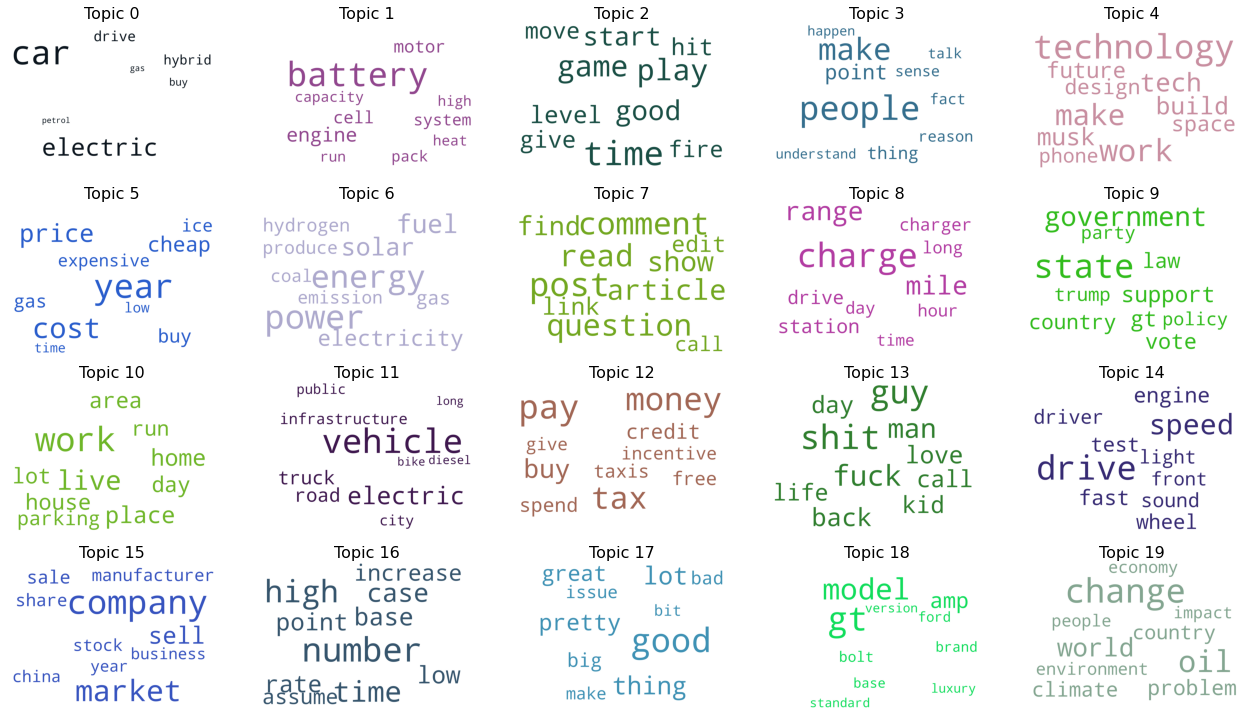

In [122]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

import seaborn as sns
import numpy as np
import random

lda_model = mallet2lda

NUM_COLORS = 20
# LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
# NUM_STYLES = len(LINE_STYLES)

sns.reset_orig()  # get default matplotlib styles back
# cols = sns.color_palette('husl', n_colors=NUM_COLORS)

import random
def random_color():
        rand = lambda: random.randint(11, 222)
        return '#%02X%02X%02X' % (rand(), rand(), rand())
cols = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for _ in range(40)]
cols = [random_color() for _ in range(26)]
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
# cols = [color for name, color in mcolors.XKCD_COLORS.items()]
random.shuffle(cols)

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0,min_font_size=80)

topics = mallet2lda.show_topics(formatted=False, num_topics=20)

fig, axes = plt.subplots(4, 5, figsize=(18,10.125), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
#     print(i,topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
# fig.savefig('Mallet_WordClouds.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()

In [123]:
# import random
# import colorsys
# h,s,l = random.random(), 0.5 + random.random()/2.0, 0.4 + random.random()/5.0
# r,g,b = [int(256*i) for i in colorsys.hls_to_rgb(h,l,s)]

# r

In [124]:
# df_reddit_extend[~df_reddit_extend.body.str.contains("(?i)play|game")].shape

In [125]:
df_reddit_extend.shape

(3162938, 75)

In [126]:
df_topic_sents_keywords = pd.read_pickle("df_topic_sents_keywords.pkl")

In [127]:
df_topic_sents_keywords.shape

(1936041, 4)

In [128]:
df_topic_sents_keywords.head()

Dominant_Topic  Perc_Contribution  \
0             5.0             0.1087   
1             5.0             0.0951   
2            12.0             0.0916   
3            15.0             0.0706   
4             6.0             0.2092   

                                      Topic_Keywords  \
0  vehicle, gas, electric, engine, fuel, ice, hyb...   
1  vehicle, gas, electric, engine, fuel, ice, hyb...   
2  change, people, world, climate, problem, human...   
3  comment, post, read, find, question, article, ...   
4  feel, guy, shit, fuck, hear, sound, love, thin...   

                                                   0  
0  Do electric vehicle owners pay road tax?  Do h...  
1  &gt;Pretty sure you can't do anything to get A...  
2  Yeah, like the Grandfather philosophies that g...  
3  Does anybody know if there is anything like th...  
4  I want my baby back baby back baby back\n\nChi...

In [129]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

contents = pd.Series(data_ready)
df_dominant_topic = pd.concat([df_topic_sents_keywords, contents], axis=1)
df_dominant_topic.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Raw Text','Text']

df_dominant_topic.head(10)

Dominant_Topic  Topic_Perc_Contrib  \
0             5.0              0.1087   
1             5.0              0.0951   
2            12.0              0.0916   
3            15.0              0.0706   
4             6.0              0.2092   
5             6.0              0.0971   
6            12.0              0.0654   
7             7.0              0.0822   
8            16.0              0.3184   
9             0.0              0.0500   

                                            Keywords  \
0  vehicle, gas, electric, engine, fuel, ice, hyb...   
1  vehicle, gas, electric, engine, fuel, ice, hyb...   
2  change, people, world, climate, problem, human...   
3  comment, post, read, find, question, article, ...   
4  feel, guy, shit, fuck, hear, sound, love, thin...   
5  feel, guy, shit, fuck, hear, sound, love, thin...   
6  change, people, world, climate, problem, human...   
7  oil, emission, increase, production, demand, c...   
8  tax, state, government, pay, credit, taxis, mo...   
9  make, people, good, thing, lot, bad, idea, wor...   

                                            Raw Text  \
0  Do electric vehicle owners pay road tax?  Do h...   
1  &gt;Pretty sure you can't do anything to get A...   
2  Yeah, like the Grandfather philosophies that g...   
3  Does anybody know if there is anything like th...   
4  I want my baby back baby back baby back\n\nChi...   
5          I commend your passion. Good on ya, mate!   
6  Was thinking that Reddit is infiltrated.\nJust...   
7  This realy shows that the governments are real...   
8  If the citizens are forced by law to vote you ...   
9            There I just upvoted you cause you CARE   

                                                Text  
0  [electric, vehicle, owner, pay, road, tax, hyb...  
1  [pretty, sure, get, accept, gal, gas, gon, acc...  
2  [grandfather, philosophy, get, horrible, sac, ...  
3                              [know, curious, find]  
4  [want, baby, back, baby, back, baby, back, bab...  
5                 [commend, passion, good, ya, mate]  
6                          [think, infiltrate, need]  
7  [show, government, realize, serious, oil, situ...  
8  [citizen, force, law, vote, turn, great, inter...  
9                                      [cause, care]

In [130]:
df_dominant_topic.shape

(2806244, 5)

In [131]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(20)

Topic_Num  Topic_Perc_Contrib  \
0         0.0              0.3025   
1         1.0              0.4411   
2         2.0              0.3068   
3         3.0              0.4362   
4         4.0              0.6000   
5         5.0              0.3901   
6         6.0              0.4823   
7         7.0              0.5194   
8         8.0              0.5144   
9         9.0              0.4291   
10       10.0              0.5011   
11       11.0              0.4692   
12       12.0              0.5541   
13       13.0              0.4661   
14       14.0              0.5955   
15       15.0              0.7673   
16       16.0              0.6345   
17       17.0              0.4149   
18       18.0              0.4547   
19       19.0              0.4627   

                                                                                 Keywords  \
0                           make, people, good, thing, lot, bad, idea, work, sense, money   
1               point, fact, wrong, talk, case, claim, number, true, argument, understand   
2                   year, time, long, start, technology, happen, future, term, ago, today   
3               model, good, pretty, great, bolt, option, nice, leaf, performance, luxury   
4                              time, back, good, side, turn, put, play, give, game, start   
5                   vehicle, gas, electric, engine, fuel, ice, hybrid, car, gasoline, run   
6                              feel, guy, shit, fuck, hear, sound, love, thing, man, back   
7   oil, emission, increase, production, demand, carbon, reduce, country, produce, impact   
8                         cost, price, year, buy, cheap, pay, month, expensive, low, high   
9                      road, truck, city, live, people, area, public, drive, work, driver   
10           battery, hydrogen, cell, pack, high, capacity, problem, heat, issue, current   
11                  charge, station, day, time, charger, home, hour, charging, trip, fast   
12             change, people, world, climate, problem, human, country, life, live, thing   
13    company, market, sell, make, manufacturer, sale, industry, business, product, build   
14               system, work, part, amp, design, build, service, usage, control, require   
15                  comment, post, read, find, question, article, link, show, check, edit   
16                  tax, state, government, pay, credit, taxis, money, job, subsidy, vote   
17             car, electric, buy, drive, make, affordable, afford, normal, petrol, fully   
18           power, energy, solar, electricity, coal, source, plant, grid, panel, nuclear   
19                        drive, range, mile, speed, motor, fast, volt, wheel, long, stop   

                                                                                    Representative Text  
0   There are 36 stories by [guidosbestfriend](https://reddit.com/u/guidosbestfriend) ([Wiki](https:...  
1   &gt;You cannot fathom that two people can look at the same data and come to different conclusion...  
2   The key piece of information you have not addressed in your question is the timeframe.  Are you ...  
3   Does this help at all? Don't worry I didn't spend as much time on it as it looks, was just a few...  
4    Dungeon Crawl Stone Soup version 0.15.0-8-gb109cf8 (tiles) character file.\n\nYendren the Slaye...  
5   Couldn't resist.\n\n    AK:  68.95 MPG  \n    AL:  66.24 MPG  \n    AR:  46.62 MPG  \n    AZ:  5...  
6   Som en som har erfaring fra bransjen, og fortsatt følger nøye med på den, så må jeg si at her va...  
7   Conventional Oil Peaked in 2006 –IEA-EIA-NATURE\n\nhttp://imgur.com/a/uCz7V\n\nhttp://www.nature...  
8   You pay that depreciation *and then some* when you lease. If you can afford to lease, you can mo...  
9   I actually disagree that it won't do much; safe driving needs to be taught, but if you're walkin...  
10  why don't we use the safest batteries? See article below. Someone told me only Arc and Boosted u...  


In [132]:
# sent_topics_sorteddf_mallet['Representative Text'].values.tolist()[16]

In [133]:
3%2

1

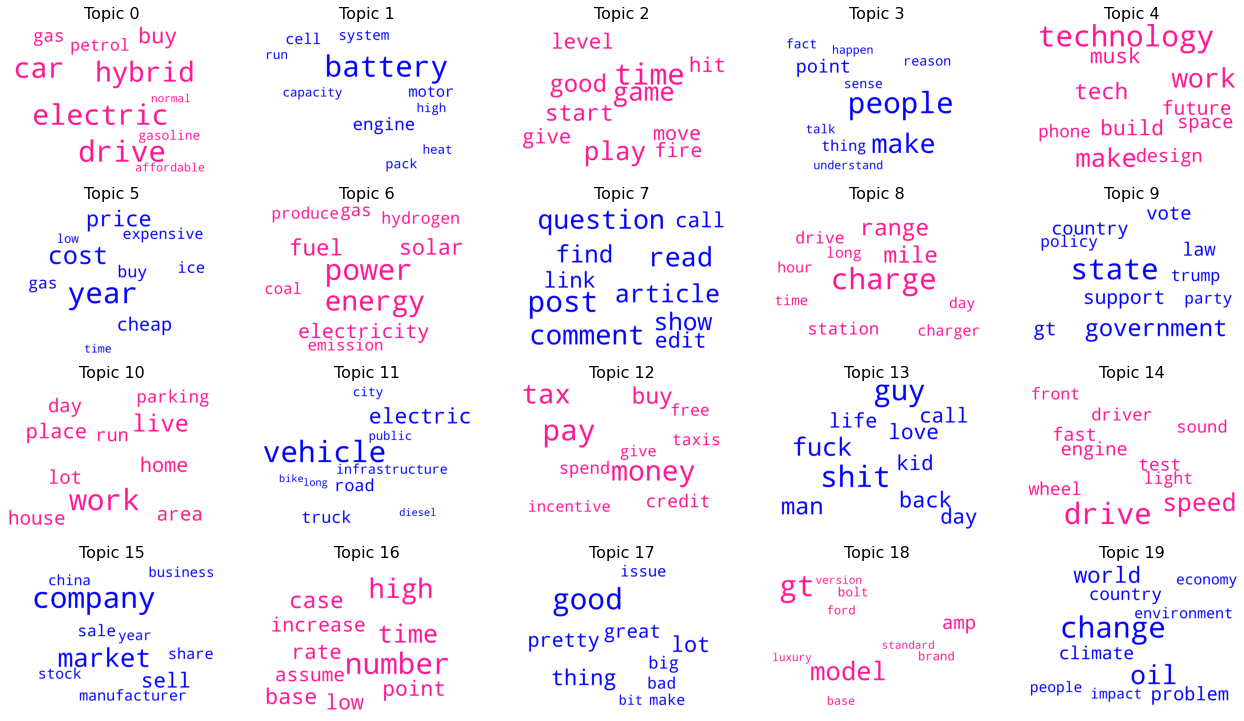

In [134]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

import seaborn as sns
import numpy as np
import random

lda_model = mallet2lda

NUM_COLORS = 20
# LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
# NUM_STYLES = len(LINE_STYLES)

sns.reset_orig()  # get default matplotlib styles back
# cols = sns.color_palette('husl', n_colors=NUM_COLORS)

import random
def random_color():
        rand = lambda: random.randint(11, 222)
        return '#%02X%02X%02X' % (rand(), rand(), rand())
cols = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for _ in range(40)]
cols = [random_color() for _ in range(30)]
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
# cols = [color for name, color in mcolors.XKCD_COLORS.items()]
cols = ["deeppink",'blue']
# random.shuffle(cols)

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=30,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0,min_font_size=80)

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i%2],
                  prefer_horizontal=1.0,min_font_size=80)


topics = mallet2lda.show_topics(formatted=False, num_topics=20, num_words=10)

fig, axes = plt.subplots(4, 5, figsize=(18,10.125), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict([(_[0],0.039) if _[1]>0.2 else _ for _ in topics[i][1]])
#     print(i,topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=350)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('Mallet_WordClouds.jpg',
            format='jpg',
            dpi=300,
            bbox_inches='tight')
plt.show()

In [135]:
lda_model = mallet2lda
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    total = len(corpus_sel)
    for i, corp in enumerate(corpus_sel):
        if i%300000==0:
            print("%d elements out of %d data."%(i,total))
#         topic_percs, wordid_topics, wordid_phivalues = model[corp]
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

# dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)    
dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=len(corpus))    

0 elements out of 2806244 data.
300000 elements out of 2806244 data.
600000 elements out of 2806244 data.
900000 elements out of 2806244 data.
1200000 elements out of 2806244 data.
1500000 elements out of 2806244 data.
1800000 elements out of 2806244 data.
2100000 elements out of 2806244 data.
2400000 elements out of 2806244 data.
2700000 elements out of 2806244 data.


In [136]:
# topic_weightage_by_doc

In [137]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False,num_topics=20) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [138]:
# df_topic_weightage_by_doc
df_dominant_topic_in_each_doc_5=df_dominant_topic_in_each_doc.iloc[:5,]
df_topic_weightage_by_doc_5 = df_topic_weightage_by_doc.iloc[:5,]
df_top3words_5 = df_top3words.iloc[:5,]

In [139]:
# range(df_dominant_topic_in_each_doc_5.Dominant_Topic.unique().__len__())
# df_dominant_topic_in_each_doc.sort_values('count',ascending=False).reset_index(drop=True).sort_values('Dominant_Topic',ascending=True),\
df_topic_weightage_by_doc.sort_values('count',ascending=False).reset_index(drop=True).sort_values('index',ascending=True)

index          count
1       0  142254.448999
11      1  139583.213668
19      2  138335.342106
4       3  141573.654790
13      4  139323.966840
9       5  140175.184203
3       6  141662.107761
8       7  140247.528697
0       8  144173.288309
17      9  138596.957725
10     10  139868.237158
18     11  138484.294772
14     12  139269.825948
6      13  140695.633186
7      14  140400.372608
2      15  142165.836095
15     16  139226.628740
5      17  141488.218434
16     18  139131.829995
12     19  139413.055974

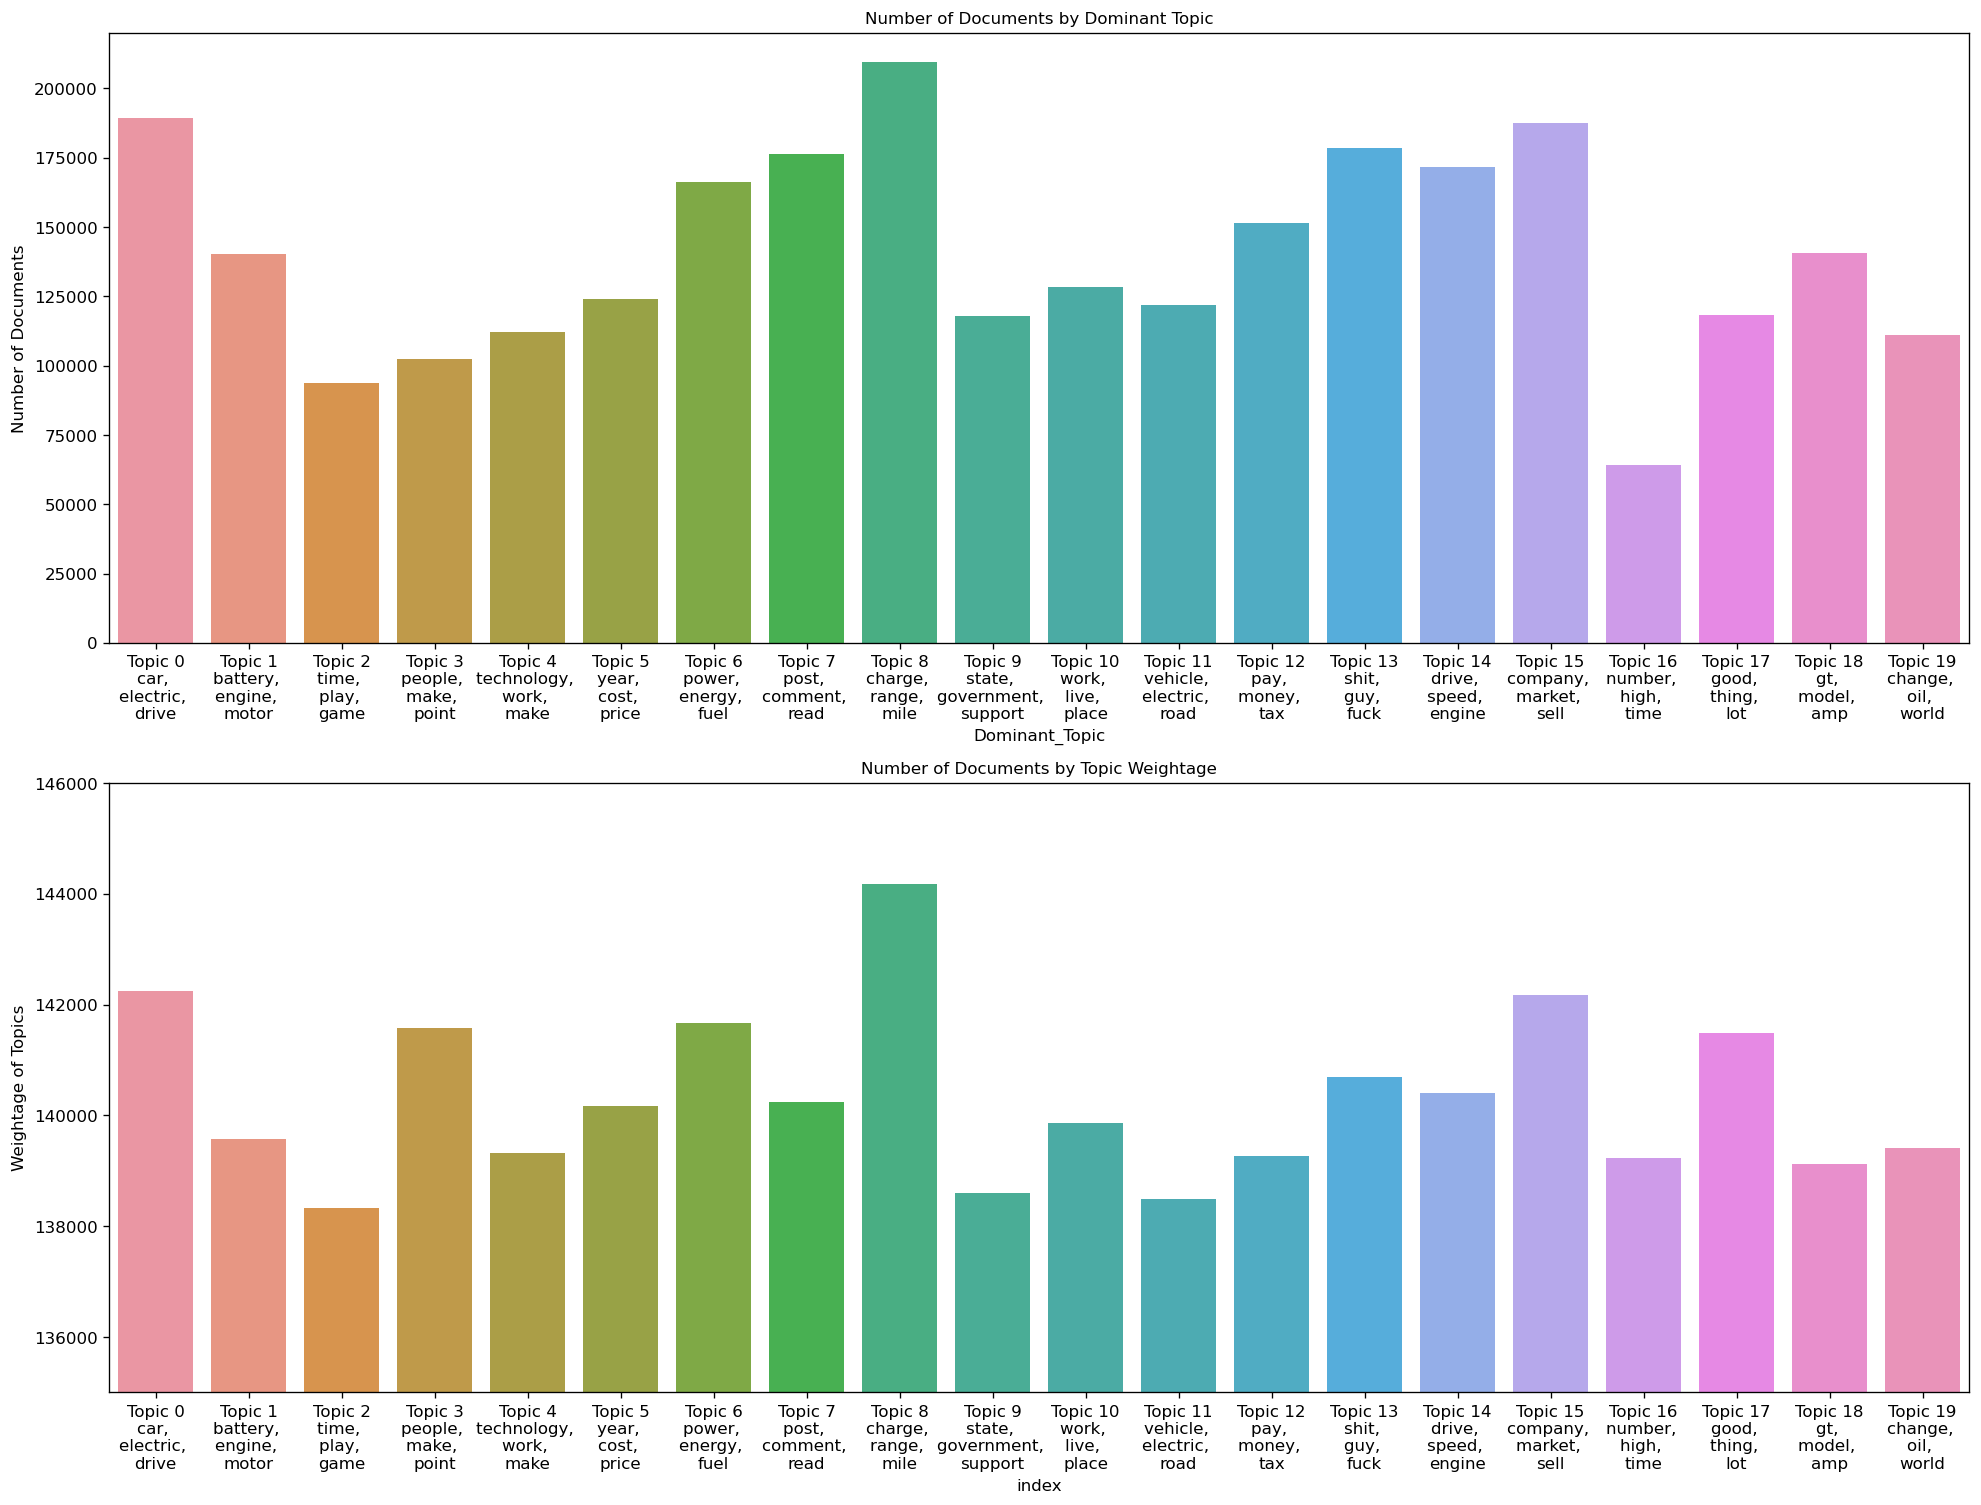

In [140]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15), dpi=120)

# Topic Distribution by Dominant Topics
g1 = sns.barplot(x='Dominant_Topic',
                y="count", 
                data=df_dominant_topic_in_each_doc, 
                ax=ax1)
# g1.set(ylim = (0, 160000))
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + 
                               df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 140000)

# Topic Distribution by Topic Weights
g2 = sns.barplot(x='index',
                y="count", 
                data=df_topic_weightage_by_doc, 
                ax=ax2)
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))
ax2.set_ylabel('Weightage of Topics')
g2.set(ylim = (135000, 146000))
# ax2.set_ylim(0, 120000)
plt.subplots_adjust(wspace=0, hspace=0.23)
# fig.savefig('Dominant_topics.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()

In [141]:
df_topic_weightage_by_doc

index          count
0       0  142254.448999
1       1  139583.213668
2       2  138335.342106
3       3  141573.654790
4       4  139323.966840
5       5  140175.184203
6       6  141662.107761
7       7  140247.528697
8       8  144173.288309
9       9  138596.957725
10     10  139868.237158
11     11  138484.294772
12     12  139269.825948
13     13  140695.633186
14     14  140400.372608
15     15  142165.836095
16     16  139226.628740
17     17  141488.218434
18     18  139131.829995
19     19  139413.055974

In [142]:
topic_weightage_by_doc.head()

0         1         2         3         4         5         6   \
0  0.076993  0.034888  0.034247  0.034718  0.034247  0.034426  0.039311   
1  0.073013  0.037285  0.042006  0.064569  0.037049  0.072142  0.059233   
2  0.063206  0.051587  0.052001  0.049240  0.043098  0.053389  0.055183   
3  0.048077  0.048077  0.050514  0.048077  0.048077  0.048077  0.048077   
4  0.037879  0.037879  0.043528  0.037879  0.037889  0.037879  0.037880   

         7         8         9         10        11        12        13  \
0  0.034247  0.055311  0.034410  0.041646  0.116777  0.129616  0.034247   
1  0.041204  0.039224  0.045736  0.038807  0.044787  0.055870  0.094831   
2  0.036278  0.036232  0.046357  0.052935  0.040057  0.047430  0.080555   
3  0.064387  0.048077  0.048077  0.049948  0.048077  0.048077  0.048112   
4  0.037879  0.037879  0.037888  0.042488  0.037879  0.040926  0.259403   

         14        15        16        17        18        19  
0  0.037843  0.047945  0.039902  0.034687  0.056596  0.047945  
1  0.036967  0.036765  0.036768  0.066259  0.036771  0.040717  
2  0.039049  0.036893  0.040845  0.051668  0.037547  0.086449  
3  0.048078  0.048077  0.048220  0.064670  0.049148  0.048077  
4  0.043566  0.037879  0.037879  0.039766  0.037879  0.037879

In [143]:
len(data_ready),topic_weightage_by_doc.shape,\
# df_topic_sents_keywords.shape

(2806244, (2806244, 20))

In [144]:
# df_topic_sents_keywords.head()

In [145]:
dataReady_sentences_EVRC = pd.read_pickle("dataReady_sentences_EVRC.pkl")
len(dataReady_sentences_EVRC)

2806244

In [146]:
# sid_obj = SentimentIntensityAnalyzer()

# # nonRT_beforeReport_vader = nonRT_beforeReport_phase.full_text.apply(lambda
# #                                                                     _:sid_obj.polarity_scores(_)['compound'])

# # nonRT_afterReport_vader = nonRT_afterReport_phase.full_text.apply(lambda
# #                                                                     _:sid_obj.polarity_scores(_)['compound'])

# sid_obj.polarity_scores('i HATE THE DOG')

# get_VADER = lambda _:sid_obj.polarity_scores(_)['compound']
# get_VADER('i HATE THE DOG')

# # vader_df_topic_sents_keywords = df_topic_sents_keywords[0].apply(lambda _:get_VADER(_))
# vader_df_topic_sents_keywords = list(map(lambda _:get_VADER(_),dataReady_sentences_EVRC))

In [147]:
# vader_df_topic_sents_keywords

In [148]:
# import pickle
# with open('vader_df_topic_sents_keywords.pkl', 'wb') as f:  
#     pickle.dump(vader_df_topic_sents_keywords,f)
# type(vader_df_topic_sents_keywords)
# vader_df_topic_sents_keywords.to_pickle("vader_df_topic_sents_keywords.pkl")

In [149]:
# np.reshape(vader_df_topic_sents_keywords.to_numpy(),(1,-1))

In [150]:
vader_df_topic_sents_keywords = pd.Series(pd.read_pickle("vader_df_topic_sents_keywords.pkl"))

In [151]:
# pd.read_pickle("vader_df_topic_sents_keywords.pkl")

In [152]:
topic_weightage_by_doc.to_numpy().shape,\
np.reshape(np.array(vader_df_topic_sents_keywords),(1,-1)).shape
# np.reshape(vader_df_topic_sents_keywords.to_numpy(),(1,-1)).shape

((2806244, 20), (1, 2806244))

In [153]:
topic_weightage = topic_weightage_by_doc.to_numpy()
where_are_NaNs = np.isnan(topic_weightage)
topic_weightage[where_are_NaNs] = 0
print(np.count_nonzero(np.isnan(topic_weightage)))

0


In [154]:
np.reshape(np.array(vader_df_topic_sents_keywords),(-1,1)),\
np.tile(np.reshape(np.array(vader_df_topic_sents_keywords),(-1,1)),20)

(array([[ 0.2211],
        [ 0.4325],
        [ 0.8658],
        ...,
        [ 0.967 ],
        [-0.7825],
        [ 0.4404]]),
 array([[ 0.2211,  0.2211,  0.2211, ...,  0.2211,  0.2211,  0.2211],
        [ 0.4325,  0.4325,  0.4325, ...,  0.4325,  0.4325,  0.4325],
        [ 0.8658,  0.8658,  0.8658, ...,  0.8658,  0.8658,  0.8658],
        ...,
        [ 0.967 ,  0.967 ,  0.967 , ...,  0.967 ,  0.967 ,  0.967 ],
        [-0.7825, -0.7825, -0.7825, ..., -0.7825, -0.7825, -0.7825],
        [ 0.4404,  0.4404,  0.4404, ...,  0.4404,  0.4404,  0.4404]]))

In [155]:
sent_mat = np.matrix(np.multiply(topic_weightage_by_doc.to_numpy(),
                                 np.tile(np.reshape(np.array(vader_df_topic_sents_keywords),(-1,1)),20)))
sent_mat

matrix([[ 0.0170231 ,  0.00771371,  0.00757192, ...,  0.00766919,
          0.01251337,  0.01060068],
        [ 0.03157804,  0.01612565,  0.01816746, ...,  0.02865681,
          0.01590344,  0.01760999],
        [ 0.05472414,  0.04466433,  0.0450225 , ...,  0.04473414,
          0.03250801,  0.0748477 ],
        ...,
        [ 0.10347986,  0.02427235,  0.0515608 , ...,  0.06706305,
          0.03595232,  0.02512369],
        [-0.02059297, -0.03505543, -0.02625845, ..., -0.04545187,
         -0.03169737, -0.04102591],
        [ 0.01835   ,  0.0209942 ,  0.01986342, ...,  0.02935819,
          0.03194447,  0.01869561]])

In [156]:
# sent_mat[:,0].A1
# list(map(lambda _:sent_mat[:,_].A1,range(20)))

In [157]:
sent_mat[:,2].A1

array([ 0.00757192,  0.01816746,  0.0450225 , ...,  0.0515608 ,
       -0.02625845,  0.01986342])

In [158]:
from scipy.stats import kurtosis
import statistics
[(kurtosis(_),_.var()) for _ in list(map(lambda _:sent_mat[:,_].A1,range(20)))]

# sent_mat[:,3].A1.var()

[(1.1863597092007767, 0.0007978141070979722),
 (10.135754957709732, 0.0009150490799732561),
 (30.056410915787872, 0.001009704783805905),
 (1.9674685382390793, 0.0008503214980703206),
 (6.877445260917918, 0.0009026787658278832),
 (3.263497110647717, 0.0008072497534983905),
 (13.56263765184363, 0.0011477646078757644),
 (15.559719783406468, 0.0009055464834702692),
 (9.220757801427347, 0.0009966862428722936),
 (23.943882651371727, 0.001107611325175281),
 (8.858817428394717, 0.0008528106034890407),
 (4.211213598707434, 0.0007982708393801035),
 (9.544871671581456, 0.000924649683150952),
 (10.897608975984047, 0.0009764596830003442),
 (9.228732083427614, 0.0009379266783644695),
 (8.02198289401272, 0.00100100550587157),
 (6.216478583863417, 0.0008280848153202494),
 (0.5799886768458422, 0.000846395104597517),
 (4.644075324806583, 0.0007980749530395844),
 (12.609747351989098, 0.0010249812592166934)]

In [159]:
[(min(_),max(_)) for _ in list(map(lambda _:sent_mat[:,_].A1,range(20)))]

[(-0.2729467744183905, 0.34477478282269225),
 (-0.4734525390338956, 0.5248094955227005),
 (-0.706427653033472, 0.6935356413007184),
 (-0.3294711995355716, 0.3072964246265155),
 (-0.3419014027826526, 0.5090107865963305),
 (-0.5046445744331397, 0.375156776078502),
 (-0.3990831409956768, 0.49151541264882403),
 (-0.5653230278929455, 0.7736955278512397),
 (-0.45591372913306477, 0.4698272759678979),
 (-0.5968670826515534, 0.7092191375781184),
 (-0.435513160310346, 0.5518507104676209),
 (-0.32697610902030894, 0.36597550078540075),
 (-0.3988181588938832, 0.545912601486257),
 (-0.6708772594724848, 0.581225964218482),
 (-0.41954286048106276, 0.5055806578018822),
 (-0.4905541871921218, 0.4233568097525908),
 (-0.5390766752971542, 0.5537739158745045),
 (-0.1916854297158802, 0.24116068776103308),
 (-0.44587190999989856, 0.6006470995552194),
 (-0.4903282101843131, 0.48995035977597146)]

    ind     topic   Kurtosis
2     2   Topic 2  30.056411
9     9   Topic 9  23.943883
7     7   Topic 7  15.559720
6     6   Topic 6  13.562638
19   19  Topic 19  12.609747
13   13  Topic 13  10.897609
1     1   Topic 1  10.135755
12   12  Topic 12   9.544872
14   14  Topic 14   9.228732
8     8   Topic 8   9.220758
10   10  Topic 10   8.858817
15   15  Topic 15   8.021983
4     4   Topic 4   6.877445
16   16  Topic 16   6.216479
18   18  Topic 18   4.644075
11   11  Topic 11   4.211214
5     5   Topic 5   3.263497
3     3   Topic 3   1.967469
0     0   Topic 0   1.186360
17   17  Topic 17   0.579989


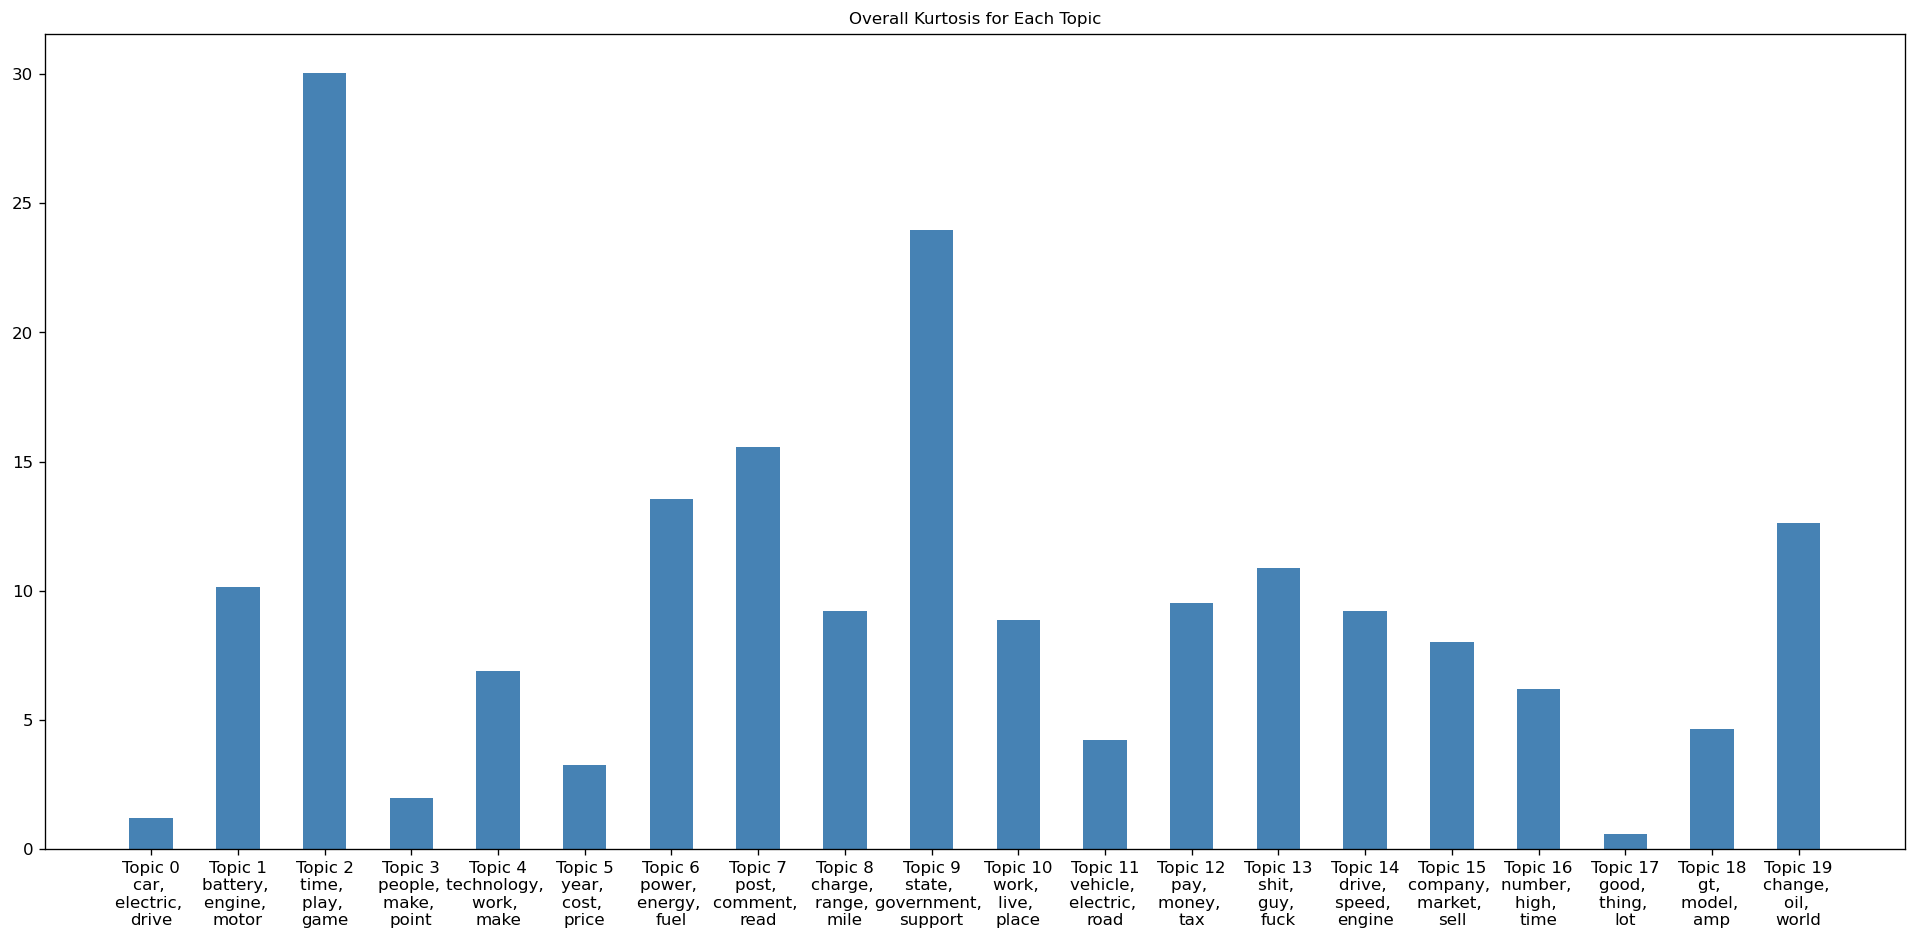

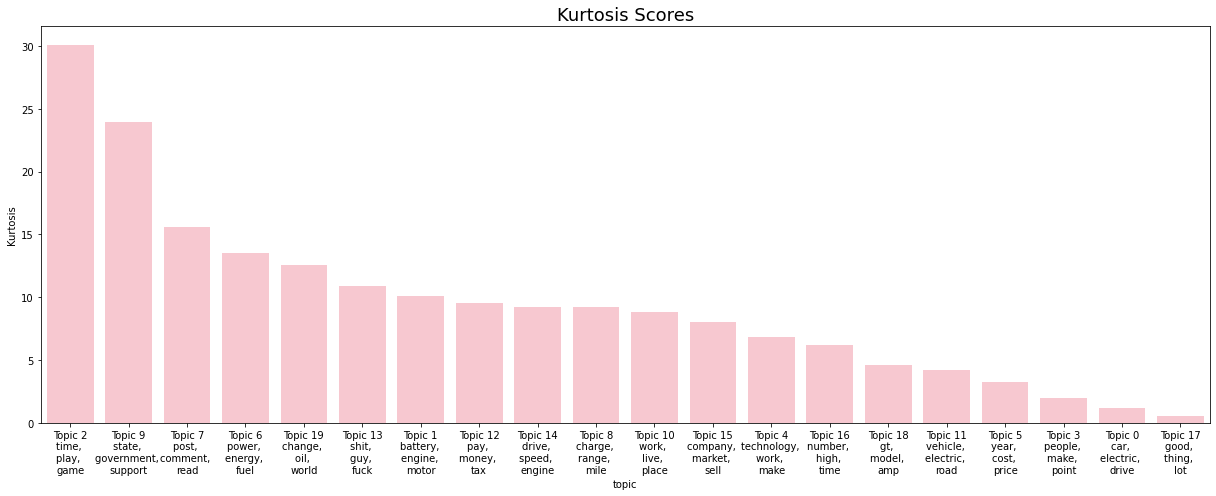

In [160]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as tkr

topic_col = ['Topic ' + str(x) for x in range(20)]
# df_topic_weightage_by_doc
# df_topic_kurtosis = pd.DataFrame(topic_senti,columns=['Kurtosis'])
df_topic_kurtosis = pd.DataFrame([kurtosis(_) for _ in list(map(lambda _:sent_mat[:,_].A1,range(20)))],
                                 columns=['Kurtosis'])
df_topic_kurtosis['ind'] = np.array(range(20))
df_topic_kurtosis['topic'] =topic_col
df_topic_kurtosis = df_topic_kurtosis[['ind','topic','Kurtosis']]
df_topic_kurtosis_sort = df_topic_kurtosis.sort_values('Kurtosis',ascending=False).copy()
print(df_topic_kurtosis_sort)
# Plot
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 14), dpi=120, sharey=True)
fig, (ax3) = plt.subplots(1, 1, figsize=(20, 9), dpi=120, sharey=True)
# # Topic Distribution by Dominant Topics
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
# ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + 
#                                df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
# ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
# ax1.set_ylabel('Number of Documents')
# # ax1.set_ylim(0, 1000)

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

# Kurtosis Distribution by Topic Weights
# ax3 = ax1.twinx()
ax3.bar(x='ind', height='Kurtosis', data=df_topic_kurtosis_sort, width=.5, color='steelblue')
ax3.set_xticks(range(df_topic_kurtosis_sort.index.unique().__len__()))
ax3.set_xticks(df_topic_kurtosis_sort['ind'].tolist())
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + 
                               df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax3.xaxis.set_major_formatter(tick_formatter)
ax3.set_title('Overall Kurtosis for Each Topic', fontdict=dict(size=10))
# ax3.set_ylim(0,25000)

# fig.savefig('Dominant_topics.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()

import seaborn as sns 
# fig,ax3 = plt.figure(figsize=(14,6))
fig, ax3 = plt.subplots(figsize=(17,7))
# make barplot and sort bars
g = sns.barplot(x='topic',
                y="Kurtosis", 
                data=df_topic_kurtosis_sort, 
                order=df_topic_kurtosis_sort.sort_values('Kurtosis',ascending = False).topic,
                color = 'pink')
# set labels
topic_order = df_topic_kurtosis_sort['ind']
xlabels = ['Topic ' + str(x)+ '\n' + 
           df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0] for x in topic_order]
g.set_xticklabels(xlabels)
# g.set(ylim = (0.12, 0.25))
# plt.xlabel("Education", size=15)
plt.title("Kurtosis Scores", size=18)
plt.tight_layout()
# plt.savefig("Topic_Kurtosis.pdf", dpi=160)
fig.savefig('Topic_Kurtosis.jpg',
            format='jpg',
            dpi=300,
            bbox_inches='tight')
plt.show()

    ind     topic  variance
6     6   Topic 6  0.001148
9     9   Topic 9  0.001108
19   19  Topic 19  0.001025
2     2   Topic 2  0.001010
15   15  Topic 15  0.001001
8     8   Topic 8  0.000997
13   13  Topic 13  0.000976
14   14  Topic 14  0.000938
12   12  Topic 12  0.000925
1     1   Topic 1  0.000915
7     7   Topic 7  0.000906
4     4   Topic 4  0.000903
10   10  Topic 10  0.000853
3     3   Topic 3  0.000850
17   17  Topic 17  0.000846
16   16  Topic 16  0.000828
5     5   Topic 5  0.000807
11   11  Topic 11  0.000798
18   18  Topic 18  0.000798
0     0   Topic 0  0.000798


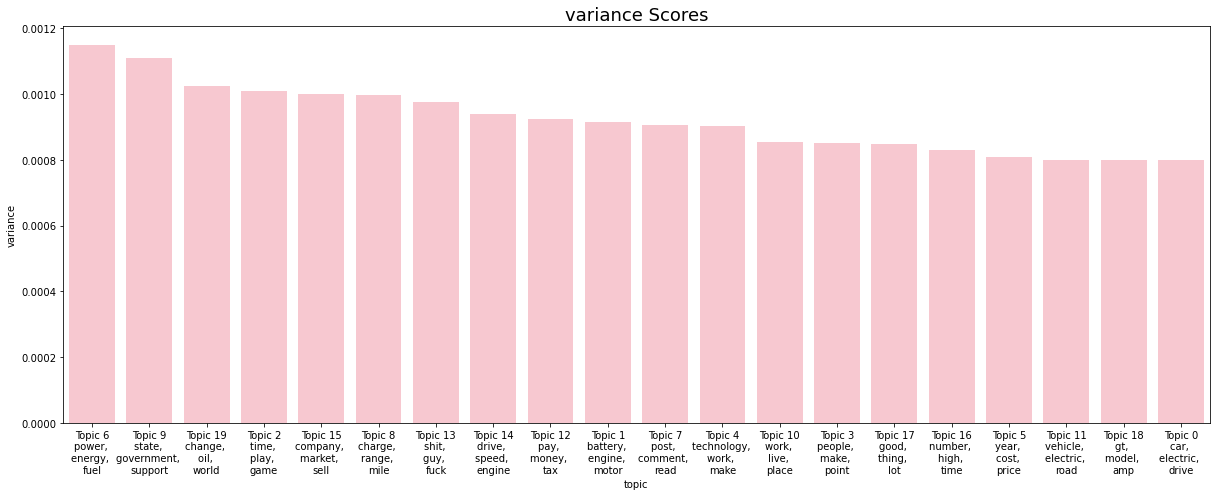

In [161]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as tkr

topic_col = ['Topic ' + str(x) for x in range(20)]
# df_topic_weightage_by_doc
# df_topic_variance = pd.DataFrame(topic_senti,columns=['variance'])
df_topic_variance = pd.DataFrame([_.var() for _ in list(map(lambda _:sent_mat[:,_].A1,range(20)))],
                                 columns=['variance'])
df_topic_variance['ind'] = np.array(range(20))
df_topic_variance['topic'] =topic_col
df_topic_variance = df_topic_variance[['ind','topic','variance']]
df_topic_variance_sort = df_topic_variance.sort_values('variance',ascending=False).copy()
print(df_topic_variance_sort)

import seaborn as sns 
# fig,ax3 = plt.figure(figsize=(14,6))
fig, ax3 = plt.subplots(figsize=(17,7))
# make barplot and sort bars
g = sns.barplot(x='topic',
                y="variance", 
                data=df_topic_variance_sort, 
                order=df_topic_variance_sort.sort_values('variance',ascending = False).topic,
                color = 'pink')
# set labels
topic_order = df_topic_variance_sort['ind']
xlabels = ['Topic ' + str(x)+ '\n' + 
           df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0] for x in topic_order]
g.set_xticklabels(xlabels)
# g.set(ylim = (0.12, 0.25))
# plt.xlabel("Education", size=15)
plt.title("variance Scores", size=18)
plt.tight_layout()
# plt.savefig("Topic_variance.pdf", dpi=160)
fig.savefig('Topic_variance.jpg',
            format='jpg',
            dpi=300,
            bbox_inches='tight')
plt.show()

    ind     topic  coefficient of variance
9     9   Topic 9                 0.109064
19   19  Topic 19                 0.105732
13   13  Topic 13                 0.105349
6     6   Topic 6                 0.098173
2     2   Topic 2                 0.096017
8     8   Topic 8                 0.089355
15   15  Topic 15                 0.088085
7     7   Topic 7                 0.086994
1     1   Topic 1                 0.086819
14   14  Topic 14                 0.086374
3     3   Topic 3                 0.085916
12   12  Topic 12                 0.084316
4     4   Topic 4                 0.079163
10   10  Topic 10                 0.079152
16   16  Topic 16                 0.075566
11   11  Topic 11                 0.075400
0     0   Topic 0                 0.074729
5     5   Topic 5                 0.074548
18   18  Topic 18                 0.073257
17   17  Topic 17                 0.070285


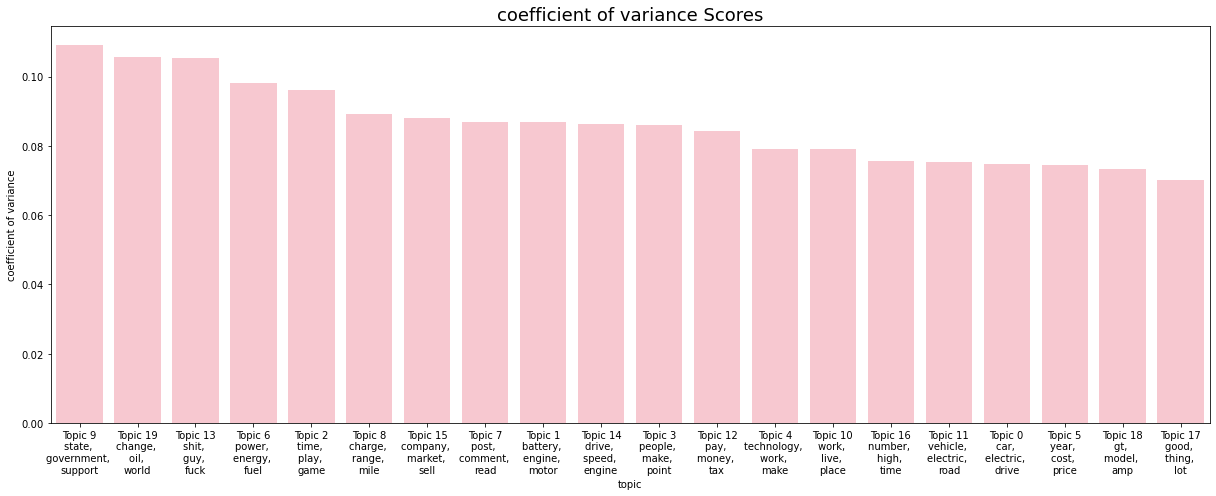

In [162]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as tkr

topic_col = ['Topic ' + str(x) for x in range(20)]
# df_topic_weightage_by_doc
# df_topic_coefficient_variance = pd.DataFrame(topic_senti,columns=['coefficient of variance'])
df_topic_coefficient_variance = pd.DataFrame([_.var()/_.mean() for _ in list(map(lambda _:sent_mat[:,_].A1,range(20)))],
                                 columns=['coefficient of variance'])
df_topic_coefficient_variance['ind'] = np.array(range(20))
df_topic_coefficient_variance['topic'] =topic_col
df_topic_coefficient_variance = df_topic_coefficient_variance[['ind','topic','coefficient of variance']]
df_topic_coefficient_variance_sort = df_topic_coefficient_variance.sort_values('coefficient of variance',ascending=False).copy()
print(df_topic_coefficient_variance_sort)

import seaborn as sns 
# fig,ax3 = plt.figure(figsize=(14,6))
fig, ax3 = plt.subplots(figsize=(17,7))
# make barplot and sort bars
g = sns.barplot(x='topic',
                y="coefficient of variance", 
                data=df_topic_coefficient_variance_sort, 
                order=df_topic_coefficient_variance_sort.sort_values('coefficient of variance',ascending = False).topic,
                color = 'pink')
# set labels
topic_order = df_topic_coefficient_variance_sort['ind']
xlabels = ['Topic ' + str(x)+ '\n' + 
           df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0] for x in topic_order]
g.set_xticklabels(xlabels)
# g.set(ylim = (0.12, 0.25))
# plt.xlabel("Education", size=15)
plt.title("coefficient of variance Scores", size=18)
plt.tight_layout()
# plt.savefig("Topic_coefficient of variance.jpg", dpi=160)
fig.savefig('Topic_coefficient of variance.jpg',
            format='jpg',
            dpi=300,
            bbox_inches='tight')
plt.show()

In [163]:
topic_weightage_by_doc.to_numpy()

array([[0.07699278, 0.03488788, 0.03424658, ..., 0.0346865 , 0.056596  ,
        0.04794521],
       [0.07301281, 0.03728473, 0.04200569, ..., 0.06625853, 0.03677095,
        0.04071674],
       [0.06320644, 0.05158735, 0.05200104, ..., 0.05166798, 0.03754679,
        0.08644918],
       ...,
       [0.10701123, 0.02510067, 0.05332037, ..., 0.06935166, 0.03717923,
        0.02598107],
       [0.02631689, 0.04479928, 0.03355713, ..., 0.05808546, 0.04050782,
        0.05242928],
       [0.04166667, 0.04767074, 0.04510314, ..., 0.06666255, 0.07253513,
        0.04245143]])

In [164]:
# np.dot(np.reshape(vader_df_topic_sents_keywords.to_numpy(),(1,-1)),topic_weightage_by_doc.to_numpy())
np.dot(np.reshape(np.array(vader_df_topic_sents_keywords),(1,-1)),topic_weightage_by_doc.to_numpy())

array([[29959.58657618, 29577.12148046, 29510.11409611, 27773.72704587,
        31999.11317434, 30387.85197327, 32808.63963775, 29211.13599045,
        31301.62991381, 28499.1252381 , 30235.27494748, 29710.18392328,
        30774.6516366 , 26010.43476731, 30472.59764063, 31890.56869974,
        30752.20819044, 33793.68922982, 30571.84530023, 27204.11058092]])

In [165]:
vader_df_topic_sents_keywords.to_numpy().dot(topic_weightage_by_doc.to_numpy())

array([29959.58657618, 29577.12148046, 29510.11409611, 27773.72704587,
       31999.11317434, 30387.85197327, 32808.63963775, 29211.13599045,
       31301.62991381, 28499.1252381 , 30235.27494748, 29710.18392328,
       30774.6516366 , 26010.43476731, 30472.59764063, 31890.56869974,
       30752.20819044, 33793.68922982, 30571.84530023, 27204.11058092])

In [166]:
np.isnan(np.sum(topic_weightage_by_doc.to_numpy())),\
np.count_nonzero(np.isnan(topic_weightage_by_doc.to_numpy()))

(False, 0)

In [167]:
topic_weightage = topic_weightage_by_doc.to_numpy()
where_are_NaNs = np.isnan(topic_weightage)
np.argwhere(where_are_NaNs)

array([], shape=(0, 2), dtype=int64)

In [168]:
ttt = topic_weightage[265,]
np.nansum(ttt),ttt

(1.0,
 array([0.04239326, 0.04726267, 0.05565338, 0.07199638, 0.04442769,
        0.04359981, 0.04416716, 0.04237288, 0.04237288, 0.0842456 ,
        0.04829392, 0.04296616, 0.04374529, 0.07488874, 0.05083442,
        0.04310211, 0.04485753, 0.04358191, 0.04239251, 0.0468457 ]))

In [169]:
topic_weightage = topic_weightage_by_doc.to_numpy()
where_are_NaNs = np.isnan(topic_weightage)
topic_weightage[where_are_NaNs] = 0
print(np.count_nonzero(np.isnan(topic_weightage)))

# vader_matrix = vader_df_topic_sents_keywords.to_numpy()
vader_matrix = np.array(vader_df_topic_sents_keywords)

topic_senti = vader_matrix.dot(topic_weightage)

topic_senti, topic_senti.max()

0


(array([29959.58657618, 29577.12148046, 29510.11409611, 27773.72704587,
        31999.11317434, 30387.85197327, 32808.63963775, 29211.13599045,
        31301.62991381, 28499.1252381 , 30235.27494748, 29710.18392328,
        30774.6516366 , 26010.43476731, 30472.59764063, 31890.56869974,
        30752.20819044, 33793.68922982, 30571.84530023, 27204.11058092]),
 33793.68922982111)

In [170]:
type(vader_matrix),
topic_weightage,topic_weightage[:,0],vader_matrix

(array([[0.07699278, 0.03488788, 0.03424658, ..., 0.0346865 , 0.056596  ,
         0.04794521],
        [0.07301281, 0.03728473, 0.04200569, ..., 0.06625853, 0.03677095,
         0.04071674],
        [0.06320644, 0.05158735, 0.05200104, ..., 0.05166798, 0.03754679,
         0.08644918],
        ...,
        [0.10701123, 0.02510067, 0.05332037, ..., 0.06935166, 0.03717923,
         0.02598107],
        [0.02631689, 0.04479928, 0.03355713, ..., 0.05808546, 0.04050782,
         0.05242928],
        [0.04166667, 0.04767074, 0.04510314, ..., 0.06666255, 0.07253513,
         0.04245143]]),
 array([0.07699278, 0.07301281, 0.06320644, ..., 0.10701123, 0.02631689,
        0.04166667]),
 array([ 0.2211,  0.4325,  0.8658, ...,  0.967 , -0.7825,  0.4404]))

In [171]:
0.07699021*0.2211

0.017022535431

In [172]:
topic_weightage[:,0]*vader_matrix

array([ 0.0170231 ,  0.03157804,  0.05472414, ...,  0.10347986,
       -0.02059297,  0.01835   ])

In [173]:
(topic_senti/df_topic_weightage_by_doc['count']).values

array([0.21060562, 0.21189598, 0.21332303, 0.19617864, 0.22967415,
       0.21678482, 0.23159785, 0.20828271, 0.21711116, 0.20562591,
       0.2161697 , 0.21453829, 0.22097142, 0.18487023, 0.21704072,
       0.2243195 , 0.22087878, 0.23884455, 0.21973293, 0.19513316])

In [174]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

    ind     topic  Sentiment
17   17  Topic 17   0.238845
6     6   Topic 6   0.231598
4     4   Topic 4   0.229674
15   15  Topic 15   0.224319
12   12  Topic 12   0.220971
16   16  Topic 16   0.220879
18   18  Topic 18   0.219733
8     8   Topic 8   0.217111
14   14  Topic 14   0.217041
5     5   Topic 5   0.216785
10   10  Topic 10   0.216170
11   11  Topic 11   0.214538
2     2   Topic 2   0.213323
1     1   Topic 1   0.211896
0     0   Topic 0   0.210606
7     7   Topic 7   0.208283
9     9   Topic 9   0.205626
3     3   Topic 3   0.196179
19   19  Topic 19   0.195133
13   13  Topic 13   0.184870


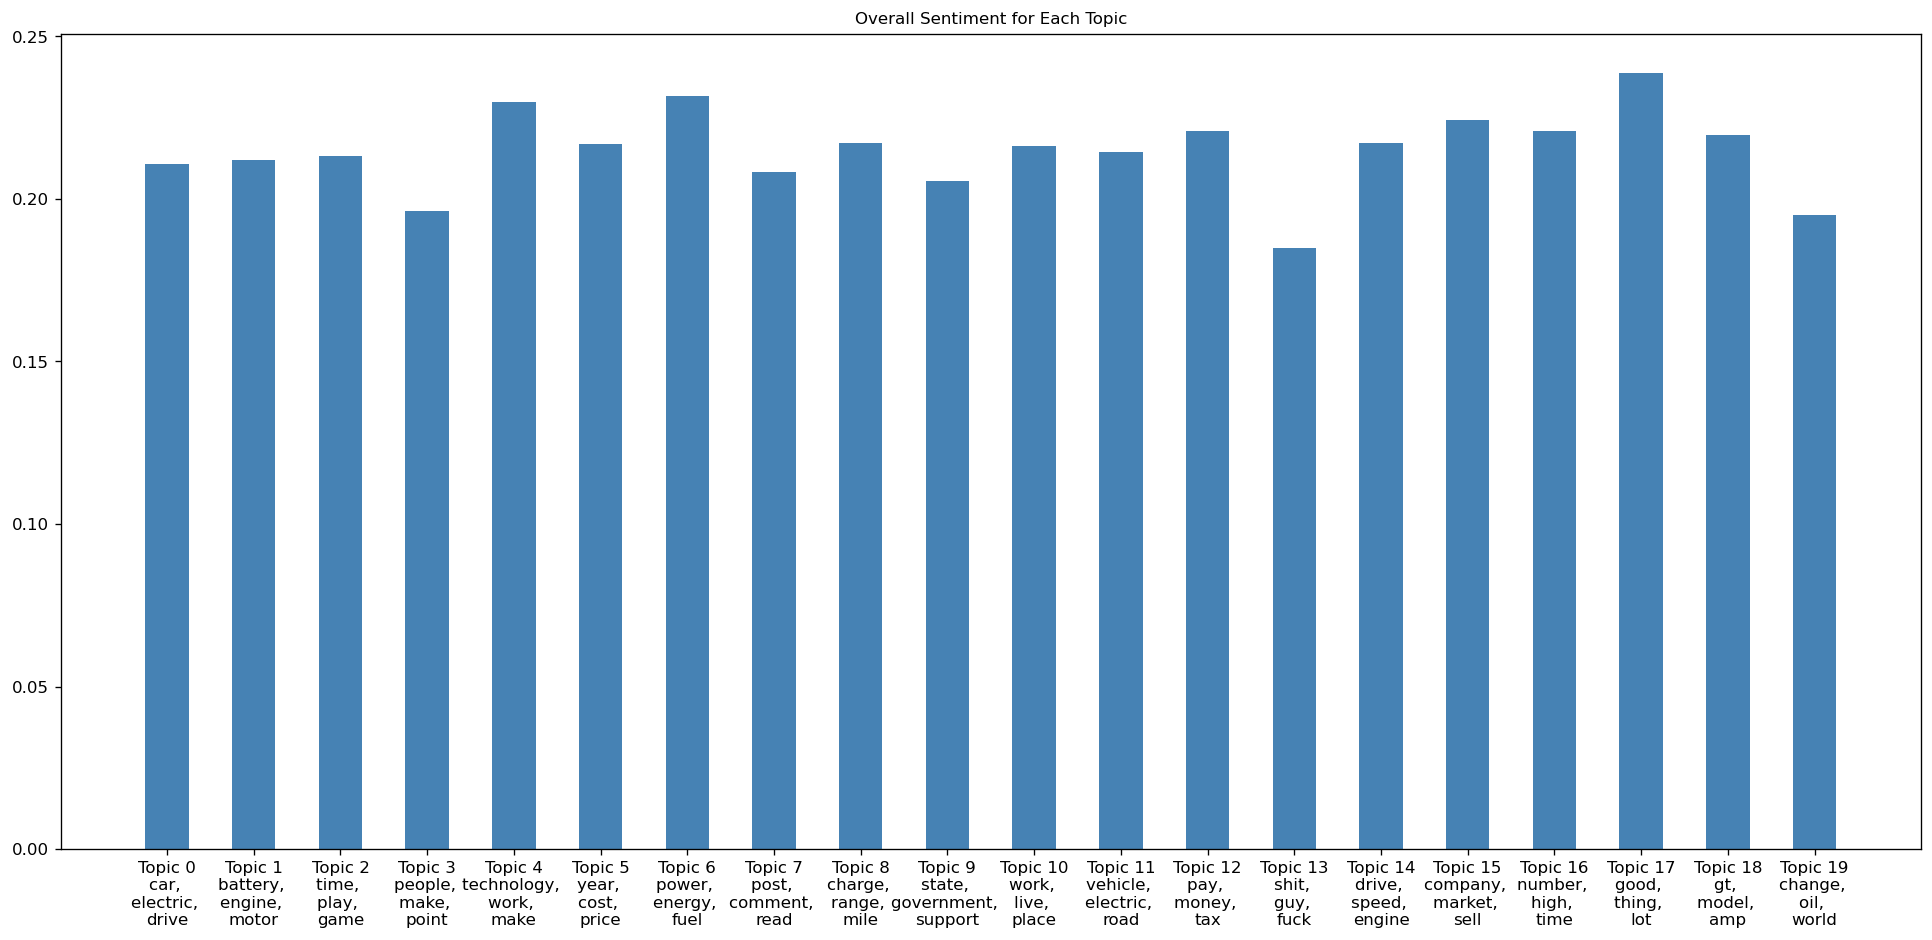

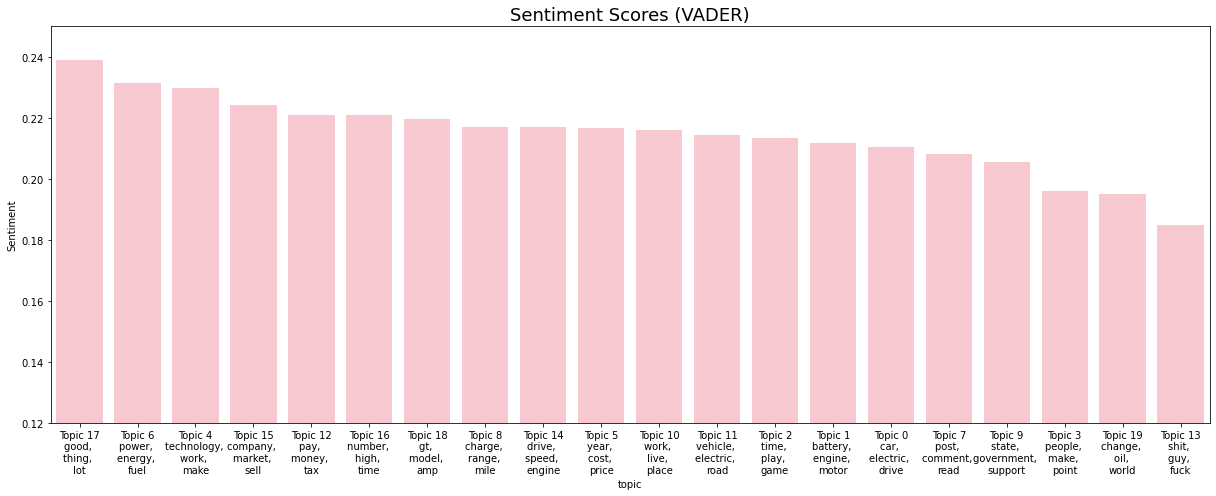

In [175]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as tkr

topic_col = ['Topic ' + str(x) for x in range(20)]
# df_topic_weightage_by_doc
# df_topic_senti = pd.DataFrame(topic_senti,columns=['Sentiment'])
df_topic_senti = pd.DataFrame((topic_senti/df_topic_weightage_by_doc['count']).values,columns=['Sentiment'])
df_topic_senti['ind'] = np.array(range(20))
df_topic_senti['topic'] =topic_col
df_topic_senti = df_topic_senti[['ind','topic','Sentiment']]
df_topic_senti_sort = df_topic_senti.sort_values('Sentiment',ascending=False).copy()
print(df_topic_senti_sort)
# Plot
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 14), dpi=120, sharey=True)
fig, (ax3) = plt.subplots(1, 1, figsize=(20, 9), dpi=120, sharey=True)
# # Topic Distribution by Dominant Topics
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
# ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + 
#                                df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
# ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
# ax1.set_ylabel('Number of Documents')
# # ax1.set_ylim(0, 1000)

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

# Sentiment Distribution by Topic Weights
# ax3 = ax1.twinx()
ax3.bar(x='ind', height='Sentiment', data=df_topic_senti_sort, width=.5, color='steelblue')
ax3.set_xticks(range(df_topic_senti_sort.index.unique().__len__()))
ax3.set_xticks(df_topic_senti_sort['ind'].tolist())
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + 
                               df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax3.xaxis.set_major_formatter(tick_formatter)
ax3.set_title('Overall Sentiment for Each Topic', fontdict=dict(size=10))
# ax3.set_ylim(0,25000)

# fig.savefig('Dominant_topics.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()

import seaborn as sns 
# fig,ax3 = plt.figure(figsize=(14,6))
fig, ax3 = plt.subplots(figsize=(17,7))
# make barplot and sort bars
g = sns.barplot(x='topic',
                y="Sentiment", 
                data=df_topic_senti_sort, 
                order=df_topic_senti_sort.sort_values('Sentiment',ascending = False).topic,
                color = 'pink')
# set labels
topic_order = df_topic_senti_sort['ind']
xlabels = ['Topic ' + str(x)+ '\n' + 
           df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0] for x in topic_order]
g.set_xticklabels(xlabels)
g.set(ylim = (0.12, 0.25))
# plt.xlabel("Education", size=15)
plt.title("Sentiment Scores (VADER)", size=18)
plt.tight_layout()
# plt.savefig("Topic_Sentiment.pdf", dpi=160)
fig.savefig('Topic_Sentiment.jpg',
            format='jpg',
            dpi=300,
            bbox_inches='tight')
plt.show()

In [176]:
# monthly_topic_weight = []
# monthly_topic_senti = []
# monthly_topic_docum = []
# for ix,month in enumerate(df_sentence_dataready.month.unique()):
#     if  ix%12==0:
#         print(month)
#     ix_lst = df_sentence_dataready.month == month
#     monthly_topic_weight.append(np.sum(topic_weightage[ix_lst],axis=0))
#     monthly_topic_senti .append((vader_matrix[ix_lst,].dot(topic_weightage[ix_lst,]))/sum(ix_lst))
#     monthly_topic_docum .append(df.iloc[ix_lst.values,].Dominant_Topic.value_counts().sort_index().values)
# #     monthly_topic_senti .append(vader_matrix[ix_lst,].dot(topic_weightage[ix_lst,]))

In [177]:
g.get_xticks(),\
g.axes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <AxesSubplot:title={'center':'Sentiment Scores (VADER)'}, xlabel='topic', ylabel='Sentiment'>)

In [178]:
g.get_xticks()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [179]:
xlabels

['Topic 17\ngood, \nthing, \nlot',
 'Topic 6\npower, \nenergy, \nfuel',
 'Topic 4\ntechnology, \nwork, \nmake',
 'Topic 15\ncompany, \nmarket, \nsell',
 'Topic 12\npay, \nmoney, \ntax',
 'Topic 16\nnumber, \nhigh, \ntime',
 'Topic 18\ngt, \nmodel, \namp',
 'Topic 8\ncharge, \nrange, \nmile',
 'Topic 14\ndrive, \nspeed, \nengine',
 'Topic 5\nyear, \ncost, \nprice',
 'Topic 10\nwork, \nlive, \nplace',
 'Topic 11\nvehicle, \nelectric, \nroad',
 'Topic 2\ntime, \nplay, \ngame',
 'Topic 1\nbattery, \nengine, \nmotor',
 'Topic 0\ncar, \nelectric, \ndrive',
 'Topic 7\npost, \ncomment, \nread',
 'Topic 9\nstate, \ngovernment, \nsupport',
 'Topic 3\npeople, \nmake, \npoint',
 'Topic 19\nchange, \noil, \nworld',
 'Topic 13\nshit, \nguy, \nfuck']

In [180]:
# df_topic_weightage_by_doc
df_topic_senti = pd.DataFrame(topic_senti,columns=['Sentiment'])
df_topic_senti['index'] = np.array(range(20))
df_topic_senti = df_topic_senti[['index','Sentiment']]
df_topic_senti

index     Sentiment
0       0  29959.586576
1       1  29577.121480
2       2  29510.114096
3       3  27773.727046
4       4  31999.113174
5       5  30387.851973
6       6  32808.639638
7       7  29211.135990
8       8  31301.629914
9       9  28499.125238
10     10  30235.274947
11     11  29710.183923
12     12  30774.651637
13     13  26010.434767
14     14  30472.597641
15     15  31890.568700
16     16  30752.208190
17     17  33793.689230
18     18  30571.845300
19     19  27204.110581

In [181]:
df_sentence_dataready = pd.read_pickle("df_sentences_dataReady.pkl")

In [182]:
df_sentence_dataready.shape,len(data_ready)

((2806244, 75), 2806244)

In [183]:
df_sentence_dataready.shape,len(data_ready)

((2806244, 75), 2806244)

In [184]:
df_sentence_dataready.month.value_counts().sort_index(ascending=True)

2011-01      1397
2011-02      1181
2011-03      2250
2011-04      1280
2011-05      1620
            ...  
2020-08     66431
2020-09     94017
2020-10     81069
2020-11     97878
2020-12    104134
Name: month, Length: 120, dtype: int64

In [185]:
df_sentence_dataready.month.value_counts().sort_index(ascending=True)

2011-01      1397
2011-02      1181
2011-03      2250
2011-04      1280
2011-05      1620
            ...  
2020-08     66431
2020-09     94017
2020-10     81069
2020-11     97878
2020-12    104134
Name: month, Length: 120, dtype: int64

In [186]:
df_sentence_dataready.month.unique()

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', 

In [187]:
sum(df_sentence_dataready.month=='2011-01')

1397

In [188]:
topic_weightage[df_sentence_dataready.month=='2011-01',].shape,\
vader_matrix[df_sentence_dataready.month=='2011-01',].shape,\
vader_matrix[df_sentence_dataready.month=='2011-01',].dot(topic_weightage[df_sentence_dataready.month=='2011-01',])

((1397, 20),
 (1397,),
 array([14.71383125, 16.85881869, 13.25200222, 12.75355172, 15.77560441,
        13.70480848, 26.32587708, 12.41146702, 12.77197   , 12.1578253 ,
        12.85966787, 13.99541986, 13.12840832, 11.24789867, 12.70668179,
        12.44980837, 15.06650013, 14.89505094, 11.85905234, 15.32311555]))

In [189]:
topic_weightage[df_sentence_dataready.month=='2011-01']

array([[0.07699278, 0.03488788, 0.03424658, ..., 0.0346865 , 0.056596  ,
        0.04794521],
       [0.07301281, 0.03728473, 0.04200569, ..., 0.06625853, 0.03677095,
        0.04071674],
       [0.06320644, 0.05158735, 0.05200104, ..., 0.05166798, 0.03754679,
        0.08644918],
       ...,
       [0.08517597, 0.03819487, 0.0487541 , ..., 0.03494399, 0.03452961,
        0.11167129],
       [0.05761918, 0.03485885, 0.03792727, ..., 0.05157171, 0.03895589,
        0.06476877],
       [0.05210424, 0.03533624, 0.03618646, ..., 0.03243515, 0.07598326,
        0.03644027]])

In [190]:
# topic_weightage_by_doc
a = np.array([[1,2,3],[4,5,6]])
np.sum(a,axis=0)

array([5, 7, 9])

In [191]:
# topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
# topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

np.sum(topic_weightage[df_sentence_dataready.month=='2011-01'],axis=0)

array([72.77499599, 73.47766576, 66.53908911, 73.09202899, 68.71104567,
       68.40952962, 90.60938284, 69.01264697, 62.99669862, 70.54880697,
       65.70432556, 69.23268022, 67.85876338, 70.34273117, 65.42373768,
       67.59770381, 70.24612294, 67.63543204, 62.34899477, 74.28669341])

In [192]:
# df.iloc[ix_lst.values,].Dominant_Topic

In [193]:
# # topic_percentages
# df.iloc[ix_lst.values,].Dominant_Topic.value_counts().sort_index().values

In [194]:
# topic_weightage[ix_lst].argmax(axis=1)
# unique_elements, counts_elements = np.unique(topic_weightage[ix_lst].argmax(axis=1), return_counts=True)
# counts_elements

In [195]:
monthly_topic_weight = []
monthly_topic_senti = []
monthly_topic_docum = []
for ix,month in enumerate(df_sentence_dataready.month.unique()):
    if  ix%12==0:
        print(month)
    ix_lst = df_sentence_dataready.month == month
    monthly_topic_weight.append(np.sum(topic_weightage[ix_lst],axis=0))
    monthly_topic_senti .append((vader_matrix[ix_lst,].dot(topic_weightage[ix_lst,]))/sum(ix_lst))
    monthly_topic_docum .append(df.iloc[ix_lst.values,].Dominant_Topic.value_counts().sort_index().values)
#     monthly_topic_senti .append(vader_matrix[ix_lst,].dot(topic_weightage[ix_lst,]))

2011-01
2012-01
2013-01
2014-01
2015-01
2016-01
2017-01
2018-01
2019-01
2020-01


In [196]:
# topic_percentages
df.iloc[ix_lst.values,].Dominant_Topic.value_counts().sort_index().values

array([ 4885,  4516,  3307,  3635,  4115,  4592,  4367,  7068,  7279,
        3678,  4501,  3974,  4553,  6936,  5228, 15926,  2358,  5094,
        4878,  3244])

In [197]:
topic_weightage[ix_lst].argmax(axis=1)
unique_elements, counts_elements = np.unique(topic_weightage[ix_lst].argmax(axis=1), return_counts=True)
counts_elements

array([ 4885,  4516,  3307,  3635,  4115,  4592,  4367,  7068,  7279,
        3678,  4501,  3974,  4553,  6936,  5228, 15926,  2358,  5094,
        4878,  3244])

In [198]:
# monthly_topic_senti
monthly_topic_senti[-1]/sum(ix_lst)

array([9.80298369e-08, 1.02627813e-07, 1.07749083e-07, 9.96508465e-08,
       1.14466987e-07, 1.07143284e-07, 1.07449565e-07, 1.05494389e-07,
       1.07664105e-07, 1.02322979e-07, 1.07754838e-07, 1.04465220e-07,
       1.08206365e-07, 9.59724202e-08, 1.04631788e-07, 1.41388885e-07,
       1.09665956e-07, 1.22274029e-07, 1.07003403e-07, 9.67255049e-08])

In [199]:
monthly_topic_weight_lst = [_.tolist() for _ in monthly_topic_weight]
# len(list(zip(*monthly_topic_weight_lst))[0])
convert_monthly_topic_weight_lst = [list(_) for _ in list(zip(*monthly_topic_weight_lst))]
len(convert_monthly_topic_weight_lst),len(monthly_topic_weight_lst)

(20, 120)

In [200]:
monthly_topic_weight[9]/np.sum(monthly_topic_weight[9])

array([0.05532119, 0.05282813, 0.04869056, 0.04987356, 0.0514012 ,
       0.04945357, 0.05527517, 0.04884992, 0.05098025, 0.04592476,
       0.04773127, 0.04849729, 0.04615918, 0.05075667, 0.05275119,
       0.04727626, 0.05026716, 0.05071796, 0.04753858, 0.04970615])

In [201]:
df_top3words.loc[df_top3words.topic_id==3, 'words'].values[0].replace("\n","")

'people, make, point'

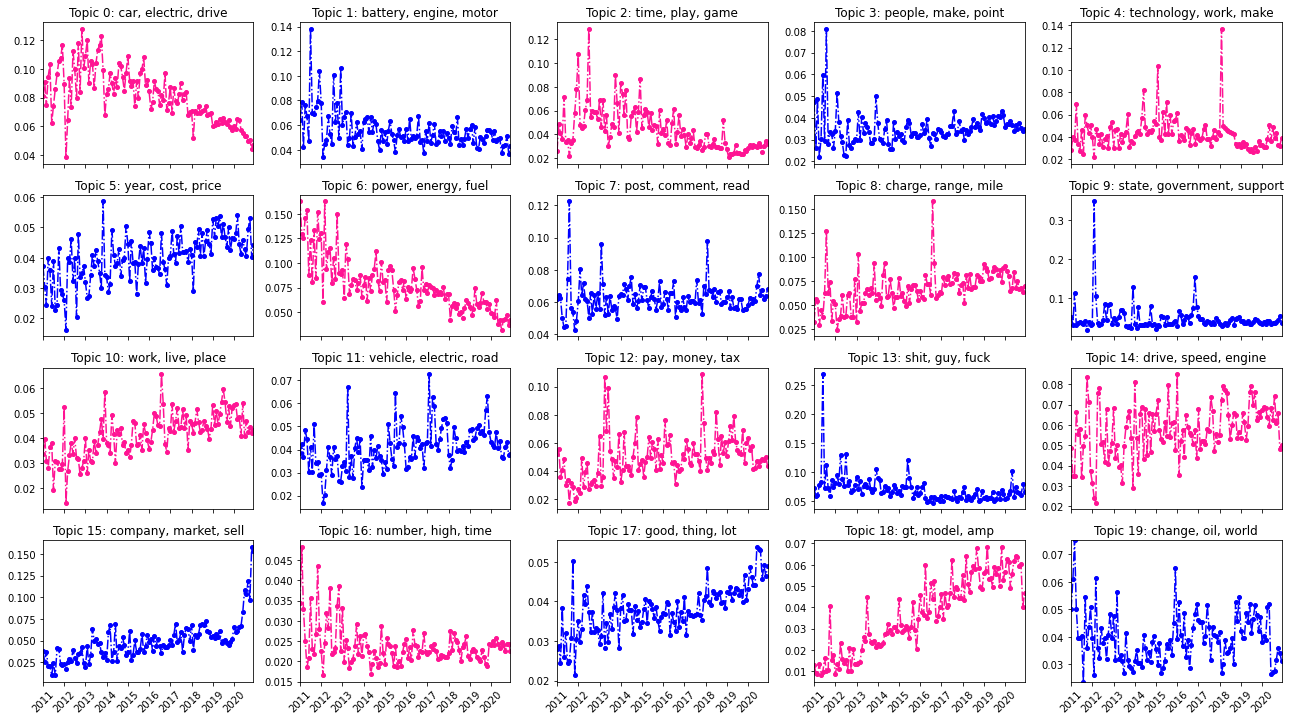

In [202]:
d = pd.date_range(start='1/1/2011', end='12/31/2020', freq='MS') 
topic_col = ['Topic ' + str(x)+": "+df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0].replace("\n","") for x in range(20)]
x = topic_col
y = monthly_topic_weight
y = [_/np.sum(_) for _ in monthly_topic_docum]

y3 = monthly_topic_docum
y3 = [_/np.sum(_) for _ in monthly_topic_docum]
# random.shuffle(cols)

fig, axes = plt.subplots(4, 5, figsize=(18,10.125), sharex=True, sharey=False)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    ax.plot_date(d, [pt[i] for pt in y],linestyle='-.',c=cols[i%2], marker=".", markersize=8)
#     topic_words = dict(topics[i][1])
# #     print(i,topic_words)
#     cloud.generate_from_frequencies(topic_words, max_font_size=350)
#     plt.gca().imshow(cloud)
    ax.tick_params(axis='x', labelrotation=45)
    plt.gca().set_title(topic_col[i], fontdict=dict(size=12))
#     plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0.65)
# plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('Topicweightmonthly_4by5.jpg',
            format='jpg',
            dpi=100,
            bbox_inches='tight')
plt.show()

In [203]:
len([color for name, color in mcolors.XKCD_COLORS.items()])

949

In [208]:
cols

['deeppink', 'blue']

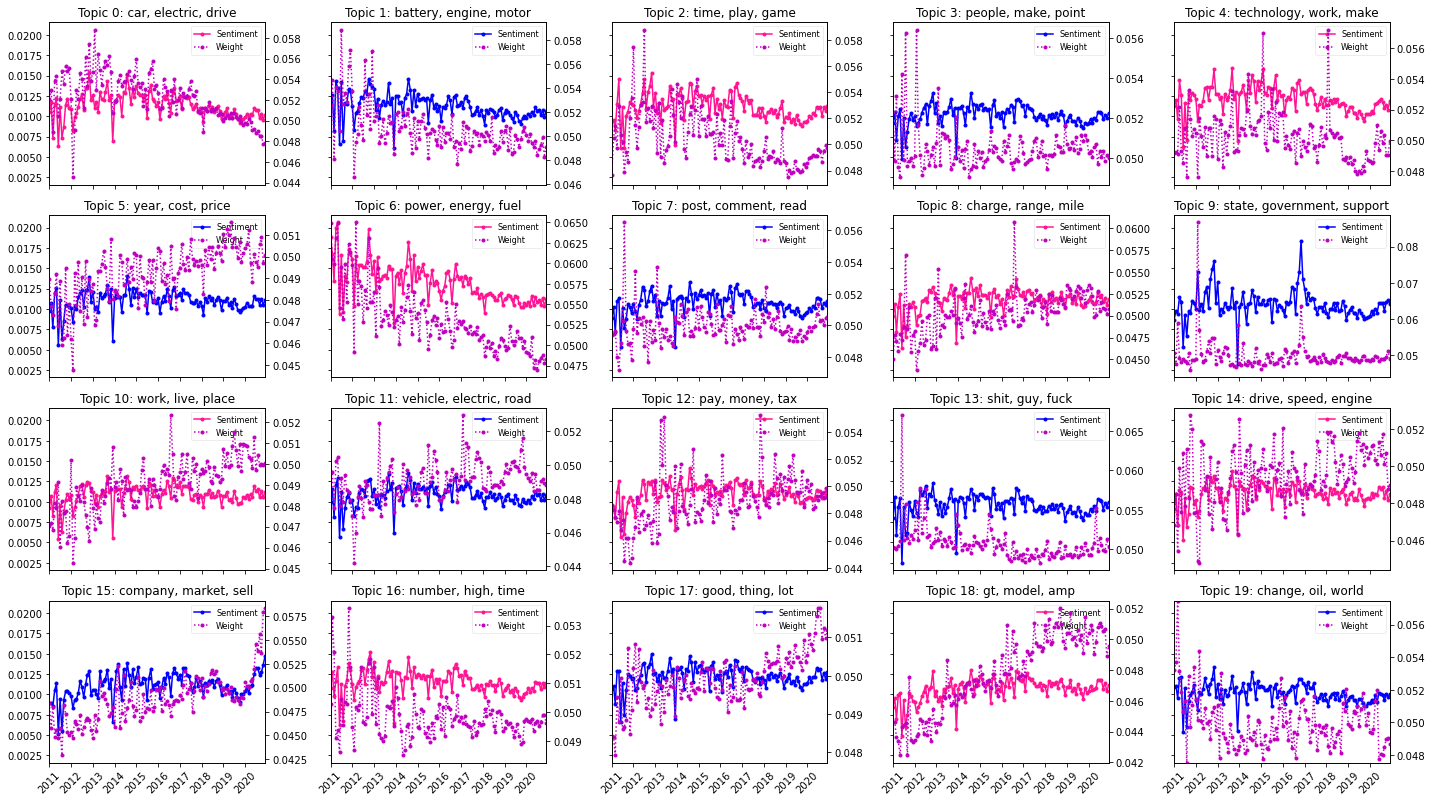

In [209]:
# 实现数据可视化中的数据平滑
import numpy as np
import matplotlib.pylab as plt
 
'''
其它的一些知识点：
raise：当程序发生错误，python将自动引发异常，也可以通过raise显示的引发异常
一旦执行了raise语句，raise语句后面的语句将不能执行
'''
 
def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re

d = pd.date_range(start='1/1/2011', end='12/31/2020', freq='MS') 
topic_col = ['Topic ' + str(x)+": "+df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0].replace("\n","") for x in range(20)]
x = topic_col
y1 = monthly_topic_senti
y2 = monthly_topic_weight
y2 = [_/np.sum(_) for _ in monthly_topic_weight]
# y = [_/np.sum(_) for _ in monthly_topic_weight]
# import random
# def random_color():
#         rand = lambda: random.randint(11, 222)
#         return '#%02X%02X%02X' % (rand(), rand(), rand())
# cols = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for _ in range(40)]
# cols = [random_color() for _ in range(56)]
# # cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
# # cols = [color for name, color in mcolors.XKCD_COLORS.items()]
# random.shuffle(cols)

fig, axes = plt.subplots(4, 5, figsize=(20,11.25), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
#     lns1 = ax.plot_date(d, [pt[i] for pt in y1],linestyle='-',c=cols[i+1], marker=".", markersize=6,label='Sentiment')
    lns1 = ax.plot_date(d, [pt[i] for pt in y1],linestyle='-',c=cols[i%2], marker=".", markersize=6,label='Sentiment')
#     ax.plot_date(d, [pt[i] for pt in y1],c=cols[4], marker=".", markersize=6)
#     y1_av = moving_average([pt[i] for pt in y1], 3)
#     lns1 = ax.plot_date(d, y1_av,linestyle='-',c=cols[4], marker=".", markersize=6, lw=0.5,label='Sentiment')
    
#     ax.tick_params(axis='y', labelcolor=cols[i+1])
#     ax.legend()
    ax2= ax.twinx()
#     lns2 = ax2.plot_date(d, [pt[i] for pt in y2],linestyle=':',c=cols[-i-1], marker=".", markersize=6,label='Weight')
    lns2 = ax2.plot_date(d, [pt[i] for pt in y2],linestyle=':',c='m', marker=".", markersize=6,label='Weight')
#     ax2.plot_date(d, [pt[i] for pt in y2],c='m', marker=".", markersize=6)
#     y2_av = moving_average([pt[i] for pt in y2], 3)
#     lns2 = ax2.plot_date(d, y2_av,linestyle='-',c='m', marker=".", markersize=6, lw=0.5,label='Weight')

#     ax2.plot_date(d, y_av,linestyle=':',c=cols[-i-1], marker=".", markersize=6)
#     ax2.tick_params(axis='y', labelcolor=cols[-i-1], labelsize= 15)
#     ax2.legend()
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    if i!= 3:
        ax.legend(lns, labs, prop={'size': 8}, fancybox=True, framealpha=0.35)
    else:
        ax.legend(lns, labs, prop={'size': 8}, fancybox=True, framealpha=0.35,loc='best')
#     topic_words = dict(topics[i][1])
# #     print(i,topic_words)
#     cloud.generate_from_frequencies(topic_words, max_font_size=350)
#     plt.gca().imshow(cloud)
    ax.tick_params(axis='x', labelrotation=45)
    plt.gca().set_title(topic_col[i], fontdict=dict(size=12))
#     plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0.65)
# plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
# fig.savefig('Topic sentimentANDweight monthly.pdf',
#             format='pdf',
#             dpi=100,
#             bbox_inches='tight')
plt.show()

In [210]:
len(monthly_topic_docum)
monthly_topic_docum[0]+monthly_topic_docum[1]
sum(monthly_topic_docum[0],monthly_topic_docum[1])
years = 10
yearly_topic_docum = []
yearly_topic_weight = []
for i in range(years):
    yearly_topic_docum .append(np.array(monthly_topic_docum[i*12:(i+1)*12]).sum(axis=0))
    yearly_topic_weight.append(np.array(monthly_topic_weight[i*12:(i+1)*12]).sum(axis=0))
# yearly_topic_docum

In [211]:
df_topic_senti_sort

ind     topic  Sentiment
17   17  Topic 17   0.238845
6     6   Topic 6   0.231598
4     4   Topic 4   0.229674
15   15  Topic 15   0.224319
12   12  Topic 12   0.220971
16   16  Topic 16   0.220879
18   18  Topic 18   0.219733
8     8   Topic 8   0.217111
14   14  Topic 14   0.217041
5     5   Topic 5   0.216785
10   10  Topic 10   0.216170
11   11  Topic 11   0.214538
2     2   Topic 2   0.213323
1     1   Topic 1   0.211896
0     0   Topic 0   0.210606
7     7   Topic 7   0.208283
9     9   Topic 9   0.205626
3     3   Topic 3   0.196179
19   19  Topic 19   0.195133
13   13  Topic 13   0.184870

In [212]:
df_sentence_dataready.head()

score        name      author subreddit_id author_flair_text   parent_id  \
0    3.0  t1_c1b0kmj    jared555     t5_2qi0s               NaN    t3_eubxq   
1    0.0  t1_c1b0s2x  sunshine-x     t5_2qh4r               NaN  t1_c1b02kc   
2    2.0  t1_c1b1dz6   [deleted]     t5_2qhw9               NaN  t1_c1aug5u   
3    2.0  t1_c1b1lfk   [deleted]     t5_2qhkd               NaN    t3_euios   
4   -1.0  t1_c1b1m2y    anstromm     t5_2cneq               NaN    t3_eujc3   

   created_utc  controversiality   subreddit edited  ...  steward_reports  \
0   1293849015                 0   bicycling  False  ...              NaN   
1   1293855106                 0  conspiracy  False  ...              NaN   
2   1293877686                 0    collapse  False  ...              NaN   
3   1293889775                 0      energy  False  ...              NaN   
4   1293890742                 0    politics  False  ...              NaN   

  awarders  associated_award  collapsed_because_crowd_control author_premium  \
0      NaN               NaN                              NaN            NaN   
1      NaN               NaN                              NaN            NaN   
2      NaN               NaN                              NaN            NaN   
3      NaN               NaN                              NaN            NaN   
4      NaN               NaN                              NaN            NaN   

  treatment_tags top_awarded_type  media_metadata comment_type  \
0            NaN              NaN             NaN          NaN   
1            NaN              NaN             NaN          NaN   
2            NaN              NaN             NaN          NaN   
3            NaN              NaN             NaN          NaN   
4            NaN              NaN             NaN          NaN   

           created_at  
0 2010-12-31 19:30:15  
1 2010-12-31 21:11:46  
2 2011-01-01 03:28:06  
3 2011-01-01 06:49:35  
4 2011-01-01 07:05:42  

[5 rows x 75 columns]

In [213]:
top_subr_lst = df_sentence_dataready.subreddit.value_counts().index[:50].tolist()
top_subr_lst = [_ for _ in ddata['ivl'] if _ !='Overall']
len(top_subr_lst)

53

In [214]:
df_sentence_dataready.subreddit.value_counts().index[:52].tolist().index('conspiracy')

51

In [215]:
# import pickle
# with open("top_subr_lst.pkl",'wb') as f:
#     pickle.dump(top_subr_lst,f)

In [216]:
monthly_topic_weight = []
monthly_topic_senti = []
monthly_topic_docum = []
for ix,month in enumerate(df_sentence_dataready.month.unique()):
    if  ix%12==0:
        print(month)
    ix_lst = df_sentence_dataready.month == month
    monthly_topic_weight.append(np.sum(topic_weightage[ix_lst],axis=0))
    monthly_topic_senti .append((vader_matrix[ix_lst,].dot(topic_weightage[ix_lst,]))/sum(ix_lst))
    monthly_topic_docum .append(df.iloc[ix_lst.values,].Dominant_Topic.value_counts().sort_index().values)
#     monthly_topic_senti .append(vader_matrix[ix_lst,].dot(topic_weightage[ix_lst,]))

2011-01
2012-01
2013-01
2014-01
2015-01
2016-01
2017-01
2018-01
2019-01
2020-01


In [217]:
# topic_weightage[df_sentence_dataready.month=='2011-01']
# topic_weightage.shape, df_sentence_dataready.shape
subreddit_topic_weight = []
subreddit_topic_senti  = []
subreddit_topic_docum = []
for i, subr in enumerate(top_subr_lst):
    if i%7==0:
        print(i,subr)
    ix_subr = df_sentence_dataready.subreddit==subr
    subreddit_topic_weight.append(np.sum(topic_weightage[ix_subr],axis=0))
    subreddit_topic_senti .append(vader_matrix[ix_subr,].dot(topic_weightage[ix_subr,]))
    subreddit_topic_docum .append(df.iloc[ix_subr.values,].Dominant_Topic.value_counts().sort_index().values)

0 environment
7 volt
14 unpopularopinion
21 worldnews
28 RealTesla
35 technology
42 investing
49 NoStupidQuestions


In [218]:
subreddit_topic_weightper = [_/np.sum(_) for _ in subreddit_topic_weight]
subreddit_topic_documper = [_/np.sum(_) for _ in subreddit_topic_docum]

In [219]:
df_subreddit_topic_docum = pd.DataFrame(np.array(subreddit_topic_documper))
# df_subreddit_topic_docum.columns = ['Topic '+str(_) for _ in range(20)]
df_subreddit_topic_docum.columns =  ['T' + str(x)+ '\n' + 
                                      df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0] for x in range(20)]
df_subreddit_topic_docum.index = ['r/'+_ for _ in top_subr_lst]
df_subreddit_topic_docum

T0\ncar, \nelectric, \ndrive  \
r/environment                              0.085627   
r/CanadaPolitics                           0.045185   
r/changemyview                             0.035718   
r/PoliticalDiscussion                      0.020000   
r/BoltEV                                   0.020357   
r/leaf                                     0.028527   
r/TeslaLounge                              0.042196   
r/volt                                     0.028457   
r/TeslaModel3                              0.040989   
r/whatcarshouldIbuy                        0.088049   
r/personalfinance                          0.065059   
r/AmItheAsshole                            0.028634   
r/politics                                 0.065001   
r/EnoughMuskSpam                           0.091490   
r/unpopularopinion                         0.086588   
r/The_Donald                               0.113130   
r/collapse                                 0.038342   
r/conspiracy                               0.065001   
r/spacex                                   0.017888   
r/wallstreetbets                           0.040939   
r/Showerthoughts                           0.179681   
r/worldnews                                0.108293   
r/news                                     0.117740   
r/AskReddit                                0.216205   
r/pics                                     0.192160   
r/unitedkingdom                            0.109470   
r/ontario                                  0.044144   
r/videos                                   0.161727   
r/RealTesla                                0.033773   
r/ukpolitics                               0.087620   
r/todayilearned                            0.122637   
r/funny                                    0.188124   
r/europe                                   0.123203   
r/canada                                   0.068602   
r/australia                                0.089769   
r/technology                               0.087393   
r/Futurology                               0.077402   
r/tech                                     0.093675   
r/newzealand                               0.069896   
r/cars                                     0.100762   
r/teslainvestorsclub                       0.031028   
r/explainlikeimfive                        0.065818   
r/investing                                0.041006   
r/teslamotors                              0.045820   
r/energy                                   0.038315   
r/science                                  0.066979   
r/electricvehicles                         0.034178   
r/stocks                                   0.027677   
r/SPACs                                    0.010574   
r/NoStupidQuestions                        0.100693   
r/IAmA                                     0.051091   
r/pennystocks                              0.017334   
r/electriccars                             0.054514   

                       T1\nbattery, \nengine, \nmotor  \
r/environment                                0.041989   
r/CanadaPolitics                             0.028981   
r/changemyview                               0.019567   
r/PoliticalDiscussion                        0.005000   
r/BoltEV                                     0.057415   
r/leaf                                       0.089683   
r/TeslaLounge                                0.033454   
r/volt                                       0.075520   
r/TeslaModel3                                0.030357   
r/whatcarshouldIbuy                          0.027208   
r/personalfinance                            0.016838   
r/AmItheAsshole                              0.005476   
r/politics                                   0.012280   
r/EnoughMuskSpam                             0.032965   
r/unpopularopinion                           0.022417   
r/The_Donald                                 0.039826   
r/collapse                                   0.029478   
r/conspiracy              

In [220]:
sorted_subreddits = ['r/'+_ for _ in ddata['ivl'] if _ !='Overall']
# sorted_subreddits,['r/'+_ for _ in top_subr_lst]
[_ for _ in sorted_subreddits if _ not in ['r/'+_ for _ in top_subr_lst]],\
[_ for _ in ['r/'+_ for _ in top_subr_lst] if _ not in sorted_subreddits],\
len(sorted_subreddits),len(['r/'+_ for _ in top_subr_lst])

([], [], 53, 53)

In [221]:
# df_subreddit_topic_docum = pd.DataFrame(np.array(subreddit_topic_documper))
# # df_subreddit_topic_docum.columns = ['Topic '+str(_) for _ in range(20)]
# df_subreddit_topic_docum.columns =  ['T' + str(x)+ '\n' + 
#                                       df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0] for x in range(20)]
# df_subreddit_topic_docum.index = ['r/'+_ for _ in top_subr_lst]
# df_subreddit_topic_docum

In [222]:
heatmap_lst_docum = []
for subreddit in df_subreddit_topic_docum.index:
    for topic in df_subreddit_topic_docum.columns:
        heatmap_lst_docum.append([subreddit,topic,df_subreddit_topic_docum.loc[subreddit,topic]])
df_heatmap_docum = pd.DataFrame(heatmap_lst_docum,columns=['subreddit','Topic','docum'])
df_heatmap_docum

subreddit                           Topic     docum
0      r/environment    T0\ncar, \nelectric, \ndrive  0.085627
1      r/environment  T1\nbattery, \nengine, \nmotor  0.041989
2      r/environment        T2\ntime, \nplay, \ngame  0.006089
3      r/environment     T3\npeople, \nmake, \npoint  0.033617
4      r/environment  T4\ntechnology, \nwork, \nmake  0.018775
...              ...                             ...       ...
1055  r/electriccars  T15\ncompany, \nmarket, \nsell  0.039897
1056  r/electriccars     T16\nnumber, \nhigh, \ntime  0.018745
1057  r/electriccars       T17\ngood, \nthing, \nlot  0.061737
1058  r/electriccars         T18\ngt, \nmodel, \namp  0.062253
1059  r/electriccars     T19\nchange, \noil, \nworld  0.015477

[1060 rows x 3 columns]

In [223]:
df_subreddit_topic_weight = pd.DataFrame(np.array(subreddit_topic_weightper))
df_subreddit_topic_weight.columns = ['T' + str(x)+ '\n' + 
                                      df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0] for x in range(20)]
df_subreddit_topic_weight.index = ['r/'+_ for _ in top_subr_lst]
df_subreddit_topic_weight

T0\ncar, \nelectric, \ndrive  \
r/environment                              0.054498   
r/CanadaPolitics                           0.049034   
r/changemyview                             0.044990   
r/PoliticalDiscussion                      0.040915   
r/BoltEV                                   0.045811   
r/leaf                                     0.047240   
r/TeslaLounge                              0.048886   
r/volt                                     0.048315   
r/TeslaModel3                              0.048877   
r/whatcarshouldIbuy                        0.056821   
r/personalfinance                          0.053712   
r/AmItheAsshole                            0.043874   
r/politics                                 0.049550   
r/EnoughMuskSpam                           0.054062   
r/unpopularopinion                         0.052412   
r/The_Donald                               0.056083   
r/collapse                                 0.044856   
r/conspiracy                               0.048960   
r/spacex                                   0.045183   
r/wallstreetbets                           0.047538   
r/Showerthoughts                           0.060469   
r/worldnews                                0.056445   
r/news                                     0.057917   
r/AskReddit                                0.064076   
r/pics                                     0.063307   
r/unitedkingdom                            0.057093   
r/ontario                                  0.050038   
r/videos                                   0.061947   
r/RealTesla                                0.046956   
r/ukpolitics                               0.053692   
r/todayilearned                            0.056568   
r/funny                                    0.062859   
r/europe                                   0.057543   
r/canada                                   0.052362   
r/australia                                0.053700   
r/technology                               0.054266   
r/Futurology                               0.052589   
r/tech                                     0.054228   
r/newzealand                               0.051633   
r/cars                                     0.055769   
r/teslainvestorsclub                       0.046234   
r/explainlikeimfive                        0.055399   
r/investing                                0.047944   
r/teslamotors                              0.049113   
r/energy                                   0.047116   
r/science                                  0.052742   
r/electricvehicles                         0.047530   
r/stocks                                   0.046017   
r/SPACs                                    0.042411   
r/NoStupidQuestions                        0.058146   
r/IAmA                                     0.048175   
r/pennystocks                              0.044095   
r/electriccars                             0.050404   

                       T1\nbattery, \nengine, \nmotor  \
r/environment                                0.047762   
r/CanadaPolitics                             0.043995   
r/changemyview                               0.042609   
r/PoliticalDiscussion                        0.040479   
r/BoltEV                                     0.050845   
r/leaf                                       0.055740   
r/TeslaLounge                                0.047863   
r/volt                                       0.054463   
r/TeslaModel3                                0.047539   
r/whatcarshouldIbuy                          0.047082   
r/personalfinance                            0.043557   
r/AmItheAsshole                              0.042716   
r/politics                                   0.042358   
r/EnoughMuskSpam                             0.045150   
r/unpopularopinion                           0.046081   
r/The_Donald                                 0.048006   
r/collapse                                   0.046275   
r/conspiracy              

In [224]:
# df_subreddit_topic_weight.loc['RealTesla','Topic 3']

In [225]:
heatmap_lst_weight = []
for subreddit in df_subreddit_topic_weight.index:
    for topic in df_subreddit_topic_weight.columns:
        heatmap_lst_weight.append([subreddit,topic,df_subreddit_topic_weight.loc[subreddit,topic]])
pd.DataFrame(heatmap_lst_weight,columns=['subreddit','Topic','weight'])

subreddit                           Topic    weight
0      r/environment    T0\ncar, \nelectric, \ndrive  0.054498
1      r/environment  T1\nbattery, \nengine, \nmotor  0.047762
2      r/environment        T2\ntime, \nplay, \ngame  0.043218
3      r/environment     T3\npeople, \nmake, \npoint  0.051925
4      r/environment  T4\ntechnology, \nwork, \nmake  0.046745
...              ...                             ...       ...
1055  r/electriccars  T15\ncompany, \nmarket, \nsell  0.047435
1056  r/electriccars     T16\nnumber, \nhigh, \ntime  0.049110
1057  r/electriccars       T17\ngood, \nthing, \nlot  0.051961
1058  r/electriccars         T18\ngt, \nmodel, \namp  0.050582
1059  r/electriccars     T19\nchange, \noil, \nworld  0.045609

[1060 rows x 3 columns]

In [226]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

# r_dataframe = pandas2ri.py2ri(df_subreddit_topic_weight)
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df_subreddit_topic_weight)

In [227]:
# %%R
# %R -i r_from_pd_df
# library("gplots")
# # reorder correlation matrix by ordering given by clustering
# kmedoids.cor <- r_from_pd_df.cor[order(4), order(4)]
# heatmap.2(kmedoids.cor, Rowv = NULL, Colv = NULL, 
#           dendrogram = "none", 
#           trace = "none", density.info = "none",
#           col = color.scheme, key = FALSE,
#           labRow = FALSE, labCol = FALSE)

In [228]:
df_subreddit_topic_weight.min()

T0\ncar, \nelectric, \ndrive          0.040915
T1\nbattery, \nengine, \nmotor        0.040479
T2\ntime, \nplay, \ngame              0.042188
T3\npeople, \nmake, \npoint           0.045752
T4\ntechnology, \nwork, \nmake        0.043322
T5\nyear, \ncost, \nprice             0.042528
T6\npower, \nenergy, \nfuel           0.041321
T7\npost, \ncomment, \nread           0.043123
T8\ncharge, \nrange, \nmile           0.039425
T9\nstate, \ngovernment, \nsupport    0.040907
T10\nwork, \nlive, \nplace            0.043583
T11\nvehicle, \nelectric, \nroad      0.042888
T12\npay, \nmoney, \ntax              0.044051
T13\nshit, \nguy, \nfuck              0.041204
T14\ndrive, \nspeed, \nengine         0.039276
T15\ncompany, \nmarket, \nsell        0.041394
T16\nnumber, \nhigh, \ntime           0.045581
T17\ngood, \nthing, \nlot             0.045508
T18\ngt, \nmodel, \namp               0.041298
T19\nchange, \noil, \nworld           0.041506
dtype: float64

In [229]:
# df_subreddit_topic_weight.style.background_gradient(cmap='Blues').to_html("df_subreddit_topic_weight_style.html")

In [230]:
df_subreddit_topic_weight_rnd = df_subreddit_topic_weight.round(decimals=4)
# df_subreddit_topic_weight.style.background_gradient(cmap='Blues').set_precision(4).to_html("df_subreddit_topic_weight_style.html")
df_subreddit_topic_weight.style.background_gradient(cmap='YlOrRd').set_precision(4)

In [231]:
df_subreddit_topic_weight

T0\ncar, \nelectric, \ndrive  \
r/environment                              0.054498   
r/CanadaPolitics                           0.049034   
r/changemyview                             0.044990   
r/PoliticalDiscussion                      0.040915   
r/BoltEV                                   0.045811   
r/leaf                                     0.047240   
r/TeslaLounge                              0.048886   
r/volt                                     0.048315   
r/TeslaModel3                              0.048877   
r/whatcarshouldIbuy                        0.056821   
r/personalfinance                          0.053712   
r/AmItheAsshole                            0.043874   
r/politics                                 0.049550   
r/EnoughMuskSpam                           0.054062   
r/unpopularopinion                         0.052412   
r/The_Donald                               0.056083   
r/collapse                                 0.044856   
r/conspiracy                               0.048960   
r/spacex                                   0.045183   
r/wallstreetbets                           0.047538   
r/Showerthoughts                           0.060469   
r/worldnews                                0.056445   
r/news                                     0.057917   
r/AskReddit                                0.064076   
r/pics                                     0.063307   
r/unitedkingdom                            0.057093   
r/ontario                                  0.050038   
r/videos                                   0.061947   
r/RealTesla                                0.046956   
r/ukpolitics                               0.053692   
r/todayilearned                            0.056568   
r/funny                                    0.062859   
r/europe                                   0.057543   
r/canada                                   0.052362   
r/australia                                0.053700   
r/technology                               0.054266   
r/Futurology                               0.052589   
r/tech                                     0.054228   
r/newzealand                               0.051633   
r/cars                                     0.055769   
r/teslainvestorsclub                       0.046234   
r/explainlikeimfive                        0.055399   
r/investing                                0.047944   
r/teslamotors                              0.049113   
r/energy                                   0.047116   
r/science                                  0.052742   
r/electricvehicles                         0.047530   
r/stocks                                   0.046017   
r/SPACs                                    0.042411   
r/NoStupidQuestions                        0.058146   
r/IAmA                                     0.048175   
r/pennystocks                              0.044095   
r/electriccars                             0.050404   

                       T1\nbattery, \nengine, \nmotor  \
r/environment                                0.047762   
r/CanadaPolitics                             0.043995   
r/changemyview                               0.042609   
r/PoliticalDiscussion                        0.040479   
r/BoltEV                                     0.050845   
r/leaf                                       0.055740   
r/TeslaLounge                                0.047863   
r/volt                                       0.054463   
r/TeslaModel3                                0.047539   
r/whatcarshouldIbuy                          0.047082   
r/personalfinance                            0.043557   
r/AmItheAsshole                              0.042716   
r/politics                                   0.042358   
r/EnoughMuskSpam                             0.045150   
r/unpopularopinion                           0.046081   
r/The_Donald                                 0.048006   
r/collapse                                   0.046275   
r/conspiracy              

In [232]:
import plotly.express as px
fig = px.imshow(df_subreddit_topic_weight.T.corr())
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue",
    width=1000,
    height=1000,
)
fig.write_html("plotly_subr_corrMatrix.html")
# fig.show()